# v3_nss_test_save-set.ipynb

A copy of v3_normal_smac_syns modified to test the network.save_state and network.set_state functions.

Modified to also test bouncy_planar_arm_v3.place_hand

In [1]:
%cd ../..
import numpy as np
import matplotlib.pyplot as plt
import time

/home/z/projects


In [2]:
%load_ext Cython

In [3]:
%%cython
from draculab import *

In [4]:
##################################
####### Create the network #######
##################################

# simulation control parameters
t_pres = 30. # number of seconds to hold each set of target lengths
rand_w = True # whether to use random weights in M->C, AF->M
M__C_type = synapse_types.gated_normal_rga # gated_normal_rga_diff, gated_normal_rga, gated_rga_21
#rga_diff = True # if True use gated_normal_rga_diff, if False gated_normal_rga
rand_targets = True # whether to train using a large number of random targets
par_set = 9 # which parameter set (from smac_pars) to test


# First the network object, the plant, the list of coordinates
net_params = {'min_delay' : 0.005,
              'min_buff_size' : 10 }

# SMAC results
smac_pars = [
{'C_tau_slow': 49.90016226180145, 'M__C_lrate': 20.256325499385603, 'dely_diff': 0.4477162684973992, 'dely_low': 0.7690321580597904, 'integ_amp': 1.8680498901623337, 'integ_decay': 1.331543939419169, 'sig1': 0.48604095779065143, 'sig2': 0.5320816125480841},
{'C_tau_slow': 27.252121017797577, 'M__C_lrate': 80.27152103642422, 'dely_diff': 0.8302689896646621, 'dely_low': 0.9448004009625702, 'integ_amp': 1.3027796535384801, 'integ_decay': 1.1151473648799848, 'sig1': 0.3333822457927232, 'sig2': 0.602142622846035},
{'C_tau_slow': 4.9141227932888265, 'M__C_lrate': 18.098479993035365, 'dely_diff': 0.8695623842178384, 'dely_low': 0.10163432855643398, 'integ_amp': 0.9804760861765895, 'integ_decay': 1.2978170473471935, 'sig1': 0.656398764586348, 'sig2': 0.6742611615552242},
{'C_tau_slow': 18.10859897690061, 'M__C_lrate': 70.58210808493664, 'dely_diff': 0.9156992538198638, 'dely_low': 0.18042294270342568, 'integ_amp': 1.59953879143932, 'integ_decay': 1.897236067590745, 'sig1': 0.3957607764124875, 'sig2': 0.5429333172434175},
{'C_tau_slow': 24.51883992020665, 'M__C_lrate': 10.7176426472955, 'dely_diff': 0.10514977247320526, 'dely_low': 0.4816425668212565, 'integ_amp': 0.052640553537827595, 'integ_decay': 1.7320132135471584, 'sig1': 0.295530218281941, 'sig2': 0.880618543454016},
{'C_tau_slow': 25.13155075541863, 'M__C_lrate': 8.160115362344975, 'dely_diff': 0.15209745789146595, 'dely_low': 0.2971574565762005, 'integ_amp': 0.7212105628587586, 'integ_decay': 1.2643001767159114, 'sig1': 0.1669654700375103, 'sig2': 0.5220741046559334},
{'C_tau_slow': 27.709738964709302, 'M__C_lrate': 62.35766801787423, 'dely_diff': 0.07370635778545681, 'dely_low': 0.38524713527134113, 'integ_amp': 1.2291955633815432, 'integ_decay': 0.9896030918849588, 'sig1': 0.14235717383922966, 'sig2': 0.9582724349305285},
{'C_tau_slow': 12.997265895460199, 'M__C_lrate': 57.65450266617434, 'dely_diff': 0.5083698033447426, 'dely_low': 0.724537611535787, 'integ_amp': 0.8589370531537637, 'integ_decay': 0.6225080770661751, 'sig1': 0.25523782305135023, 'sig2': 0.36341948478792335},
{'C_tau_slow': 28.25750454812256, 'M__C_lrate': 19.252231491689262, 'dely_diff': 0.8763317882227273, 'dely_low': 0.841057789838837, 'integ_amp': 1.9778746085958865, 'integ_decay': 1.5874651978467111, 'sig1': 0.2718302954029159, 'sig2': 0.03423522965364858},
{'C_tau_slow': 27.009797921470376, 'M__C_lrate': 17.694235082185887, 'dely_diff': 0.9384702718097053, 'dely_low': 0.6517772404779072, 'integ_amp': 0.2424992022256729, 'integ_decay': 1.6757876363132431, 'sig1': 0.5141582780361669, 'sig2': 0.3071316800951735},
{'C_tau_slow': 25.729475034960863, 'M__C_lrate': 48.401533341300016, 'dely_diff': 0.24880132489065293, 'dely_low': 0.9746745035966982, 'integ_amp': 0.794323985976406, 'integ_decay': 0.5237268865028553, 'sig1': 0.41274555308325395, 'sig2': 0.3028571295297247},
{'C_tau_slow': 39.010267662409674, 'M__C_lrate': 33.119435678535304, 'dely_diff': 0.4986448750167204, 'dely_low': 0.33383698843467075, 'integ_amp': 0.16451224022611344, 'integ_decay': 1.3405396186429095, 'sig1': 0.9552533588686478, 'sig2': 0.6841484570576724},
{'C_tau_slow': 27.252121017797577, 'M__C_lrate': 79.76447366382578, 'dely_diff': 0.9793711907204399, 'dely_low': 0.9830480060207323, 'integ_amp': 1.2659311648927787, 'integ_decay': 1.1769262305731851, 'sig1': 0.12834583948739434, 'sig2': 0.7027399937002696},
{'C_tau_slow': 29.74481631589189, 'M__C_lrate': 9.901672707786418, 'dely_diff': 0.049978459103808534, 'dely_low': 0.8986963379124208, 'integ_amp': 1.8438486164295065, 'integ_decay': 1.4995234577998642, 'sig1': 0.15367679188724145, 'sig2': 0.6063690021347338},
{'C_tau_slow': 35.89214723944998, 'M__C_lrate': 33.37190084703984, 'dely_diff': 0.8695479326390626, 'dely_low': 0.47774803863208554, 'integ_amp': 1.2463743741545108, 'integ_decay': 1.0057687470085104, 'sig1': 0.4519939350991195, 'sig2': 0.43024783779731374},
{'C_tau_slow': 34.4537421036612, 'M__C_lrate': 30.181240076812124, 'dely_diff': 0.18244166780521462, 'dely_low': 0.8616640027270661, 'integ_amp': 1.1931544367082136, 'integ_decay': 1.5187889664847, 'sig1': 0.8553123793461737, 'sig2': 0.12069845945582337},
{'C_tau_slow': 36.125431675125455, 'M__C_lrate': 19.179672286682916, 'dely_diff': 0.3129705870870137, 'dely_low': 0.2809586827400535, 'integ_amp': 1.293055288788612, 'integ_decay': 1.0052978776894752, 'sig1': 0.902479273391096, 'sig2': 0.755171077907023},
{'C_tau_slow': 27.216028584333692, 'M__C_lrate': 24.821548897212057, 'dely_diff': 0.6056479425068247, 'dely_low': 0.9383520595323166, 'integ_amp': 1.9763366064562846, 'integ_decay': 1.1923753169724318, 'sig1': 0.06679587483694582, 'sig2': 0.6470469584127114},
{'C_tau_slow': 43.65235157707517, 'M__C_lrate': 19.630877556410248, 'dely_diff': 0.9839068656993065, 'dely_low': 0.07985377947673952, 'integ_amp': 0.16376085261522544, 'integ_decay': 0.8070659249467205, 'sig1': 0.2586941180276561, 'sig2': 0.3986169740263769},
{'C_tau_slow': 40.21935826195853, 'M__C_lrate': 24.109667476701, 'dely_diff': 0.08852751974460826, 'dely_low': 0.9107932744583151, 'integ_amp': 1.1474968260770186, 'integ_decay': 1.5899088641287276, 'sig1': 0.48106556698704567, 'sig2': 0.501550946801979}
]

min_del = net_params['min_delay']
for par in smac_pars:
    par['dely1'] = min_del*np.round(par['dely_low']/min_del)
    par['dely2'] = par['dely1'] + min_del*np.round(par['dely_diff']/min_del)

smac_set = smac_pars[par_set]

P_params = {  'type' : plant_models.bouncy_planar_arm_v3,
          'mass1': 1.,
          'mass2': 1.,
          's_min' : -0.8,
          'p1' : (-0.01, 0.04),
          'p2' : (0.29, 0.03),
          'p3' : (0., 0.05),
          'p5' : (0.01, -0.05),
          'p10': (0.29, 0.03),
          'init_q1': 0.,
          'init_q2': np.pi/2.,
          'init_q1p': 0.,
          'init_q2p': 0.,
          'g': 0.0,
          'mu1': 3.,
          'mu2': 3.,
          'l_torque' : 0.01,
          'l_visco' : 0.01,
          'g_e' : 2.*np.array([10., 20., 20., 10., 20., 20.]),
          'l0_e' : [1.]*6,
          'Ia_gain' : 2.5*np.array([3.,10.,10., 3.,10.,10.]),
          'II_gain' : 2.*np.array([3., 8., 8., 3., 8., 8.]),
          'Ib_gain' : 1.,
          'T_0' : 10.,
          'k_pe_e' : 5.,  #8
          'k_se_e' : 25., #13
          'b_e' : 5.,
          'g_s' : 0.02,
          'k_pe_s' : 2., 
          'k_se_s' : 2.,
          'g_d' : 0.01,
          'k_pe_d' : .2, #.1,
          'k_se_d' : 1., #2.,
          'b_s' : .5,
          'b_d' : 2.,#3.,
          'l0_s': .7,
          'l0_d': .8,
          'fs' : 0.1,
          'se_II' : 0.5,
          'cd' : 0.5,
          'cs' : 0.5,
          'tau' : 0.1   # ficticious time constant used in create_freqs_steps
           }
net = network(net_params)
P = net.create(1, P_params)
arm = net.plants[P]

# We organize the spinal connections through 4 types of symmetric relations
# these lists are used to set intraspinal connections and test connection matrices
antagonists = [(0,3), (1,2), (4,5)]
part_antag = [(0,2),(0,5), (3,4), (1,3)]
synergists = [(0,1), (0,4), (2,3), (3,5)]
part_syne = [(1,4), (2,5)]
self_conn = [(x,x) for x in range(6)]

antagonists += [(p[1],p[0]) for p in antagonists]
part_antag += [(p[1],p[0]) for p in part_antag]
synergists += [(p[1],p[0]) for p in synergists]
part_syne += [(p[1],p[0]) for p in part_syne]
all_pairs = [(i,j) for i in range(6) for j in range(6)]
#unrelated = set(all_pairs) - set(antagonists) - set(part_antag) - set(synergists) - set(part_syne) - set(self_conn)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# UNIT PARAMETER DICTIONARIES
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
par_heter = 0.001 # range of heterogeneity as a fraction of the original value
#randz1 = lambda : (1. + par_heter*(np.random.rand()-0.5))
randz6 = lambda : (1. + par_heter*(np.random.rand(6)-0.5))
randz12 = lambda : (1. + par_heter*(np.random.rand(12)-0.5))
randz18 = lambda : (1. + par_heter*(np.random.rand(18)-0.5))
randz36 = lambda : (1. + par_heter*(np.random.rand(36)-0.5))

ACT_params = {'type' : unit_types.act,
              'tau_u' : 8.,
              'gamma' : 2.,
              'g' : 2.,
              'theta' : 1.,
              'tau_slow' : 5.,
              'y_min' : 0.2,
              'rst_thr' : 0.1,
              'init_val' : 0. }
spf_sum_min = .4 # value where no corrections are needed anymore
y_min = 1./(1. + np.exp(-ACT_params['g']*(spf_sum_min - ACT_params['theta'])))
ACT_params['y_min'] = y_min

AF_params = {'type' : unit_types.chwr_linear, #logarithmic,
             'init_val' : [0.05, 0.05, 0.07, 0.06, 0.06, 0.06, # avg afferent values
                           0.09, 0.06, 0.19, 0.10, 0.14, 0.07,
                           0.25, 0.16, 0.36, 0.29, 0.27, 0.19]*2,
             'tau' : 0.02 * randz36(),
             'tau_fast': 0.1,
             'tau_mid' : 1.,
             'tau_slow' : 400., # using a slow value, so init_val is important
             'delay' : 0.1,
             'thresh' : 0. } #-.1
AL_params = {'type' : unit_types.sigmoidal,
             'thresh' : 0.6 * randz6(),
             'slope' : 2. * randz6(),
             'init_val' : 0.1 * randz6(),
             'tau' : 0.05 * randz6() }
CE_params = {'type' : unit_types.gated_rga_inpsel_adapt_sig,
             'thresh' : 0. * randz6(),
             'slope' : 1.5 * randz6(),
             'init_val' : 0.2 * randz6(),
             'tau' : 0.1, #0.02 * randz6(),
             'tau_fast': 0.1,
             'tau_mid' : 1.,
             'tau_slow' : smac_set['C_tau_slow'],
             'custom_inp_del' : 15, # placeholder values
             'custom_inp_del2': 30,
             'integ_amp' : smac_set['integ_amp'], #.5,
             'integ_decay' : smac_set['integ_decay'],
             'adapt_amp' : 10., #8.,
             'delay' : 0.2,
             'des_out_w_abs_sum' : 1. }
CI_params = {'type' : unit_types.gated_rga_inpsel_adapt_sig,
             'thresh' : 0.5 * randz6(),
             'slope' : 2. * randz6(),
             'init_val' : 0.2 * randz6(),
             'tau' : 0.05, #0.01 * randz6(), #0.02 * randz6(),
             'tau_fast': 0.1,
             'tau_mid' : 1.,
             'tau_slow' : smac_set['C_tau_slow'],
             'custom_inp_del' : 15, # placeholder values
             'custom_inp_del2': 30,
             'integ_amp' : smac_set['integ_amp'], #.5,
             'integ_decay' : smac_set['integ_decay'],
             'adapt_amp' : 10., #8.,
             'delay' : 0.2,
             'des_out_w_abs_sum' : 1. }
M_params = {'type' : unit_types.gated_out_norm_am_sig,
            'thresh' : 0. * randz12(),
            'slope' : 3. * randz12(),
            'init_val' : 0.2 * randz12(),
            'delay' : 0.2,
            'tau_fast': 0.15,
            'tau_mid': 1.5,
            'tau_slow' : 10.,
            'tau' : 0.01 * randz12(),
            'p0_inp' : 0.0,
            'des_out_w_abs_sum' : 2. }
SF_params = {'type' : unit_types.sigmoidal,
             #'thresh' : np.array([0.]*12),
             'thresh' : np.array([-0.02, -0.01, 0.03, -0.01, -0.03, -0.02, -0.02, -0.01, 0.03, -0.01, -0.03, -0.02]),
             #'slope' : np.array([np.log(5.)]*12), #np.array([np.log(9.)]*12),
             'slope' : 15.*np.array([1.35, 1.38, 1.43, 1.37, 1.35, 1.36, 1.35, 1.38, 1.43, 1.37, 1.35, 1.36]),
             'init_val' : 0.2 * randz12(),
             'tau' : 0.03 * randz12() } 
SP_params = {'type' : unit_types.source,
             'init_val' : 0.5,
             'tau_fast' : 0.02,
             'tau_mid' : 0.1,
             'function' : lambda t: None }
SP_CHG_params = {'type' : unit_types.sigmoidal,
              'thresh' : 0.25,
              'slope' : 9.,
              'init_val' : 0.1,
              'tau' : 0.01 }
SPF_params = {'type' : unit_types.sigmoidal,
              'thresh' : 0.4 * randz12(),
              'slope' : 6. * randz12(),
              'init_val' : 0.3 * randz12(),
              'tau_fast': 0.005,
              'tau_mid': 0.05,
              'tau_slow' : 5.,
              'tau' : 0.02 * randz12() }
track_params = {'type' : unit_types.source,
                'init_val' : 0.02,
                'function' : lambda t: None }

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# CONNECTION DICTIONARIES
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# ACT to CE,CI ------------------------------------------------
ACT__CE_conn = {'rule' : "all_to_all",
                'delay' : 0.02 } 
ACT__CE_syn = {'type' : synapse_types.static,
               'inp_ports' : 4,
               'init_w' : 1. }
ACT__CI_conn = {'rule' : "all_to_all",
                'delay' : 0.02 } 
ACT__CI_syn = {'type' : synapse_types.static,
               'inp_ports' : 4,
               'init_w' : 1. }
# AF to CE, CI --------------------------------------------------
AF__CE_conn = {'rule' : 'all_to_all',
               'delay' : 0.02 }
AF__CE_syn = {'type' : synapse_types.gated_inp_sel,
              'aff_port' : 2,
              'inp_ports' : 2,
              'error_port' : 0,
              'normalize' : True,
              'w_sum' : 2.,
              'lrate' : 0., #10.,
              'extra_steps' : 1,
              'init_w' : 0.005 }
AF__CI_conn = {'rule' : 'all_to_all',
               'delay' : 0.02 }
AF__CI_syn = {'type' : synapse_types.gated_inp_sel,
              'aff_port' : 2,
              'inp_ports' : 2,
              'error_port' : 0,
              'normalize' : True,
              'w_sum' : 2.,
              'lrate' : 0., #10.,
              'extra_steps' : 1,
              'init_w' : 0.005 }
# AF to M ------------------------------------------------
## Creating a test matrix
if not rand_w:
    # Initializing manually
    AF_M = np.zeros((36, 12)) # rows are source, columns target
    for src in range(36):
        for trg in range(12):
            src_pop = src%6 #src's population
            trg_pop = trg%6 #trg's population
            if src%18 < 6: # if the afferent is tension, don't reverse signs
                sig = 1
            else:
                sig = -1
            if src > 17: sig = -sig # if 'negative' afferent reverse sign
            for pair in antagonists:
                if pair == (src_pop, trg_pop):
                    AF_M[src, trg] = sig*0.2
                    break
            else: 
                for pair in part_antag:
                    if pair == (src_pop, trg_pop):
                        AF_M[src, trg] = sig*0.1
                        break
                else: 
                    for pair in synergists:
                        if pair == (src_pop, trg_pop):
                            AF_M[src, trg] = sig*-0.2
                            break
                    else: 
                        for pair in synergists:
                            if pair == (src_pop, trg_pop):
                                AF_M[src, trg] = sig*-0.2
                                break
                        else: 
                            for pair in part_syne:
                                if pair == (src_pop, trg_pop):
                                    AF_M[src, trg] = sig*-0.1
                                    break
                            else:
                                if src_pop == trg_pop:
                                    AF_M[src, trg] = sig*-0.3
else:
    #AF_M = 0.2*(np.random.random((12,12)) - 0.5) # random initial connections!!!!!
    AF_M = 0.2*(np.random.random((12,36)) - 0.5) # random initial connections!!!!!
AF__M_conn = {'rule' : 'all_to_all',
             'delay' : 0.02 }
AF__M_syn = {'type' : synapse_types.gated_diff_inp_sel,
            'aff_port' : 0,
            'error_port' : 1,
            'normalize' : True,
            'w_sum' : 10.,
            'inp_ports' : 0, # afferent for out_norm_am_sig
            'input_type' : 'pred', # if using inp_corr
            'lrate' : 15., #10.
            'extra_steps' : None, # placeholder value; filled below,
            'init_w' : AF_M.flatten() }
# AF to SF ------------------------------------------------
AF__SF_dubya = np.array([0.57, 0.56, 0.56, 0.57, 0.55, 0.55, 0.57, 0.56, 0.56, 0.57, 0.55, 0.55])
AFe__SF_conn = {'rule' : 'one_to_one',
              'delay' : 0.02 }
AFe__SF_syn = {'type' : synapse_types.static,
             #'init_w' : .5*np.array([ 39.73, 15.03,  9.66, 116.47, 8.63,  63.68, 20.88, 9.69, 5.86, 67.98, 5.44, 57.38]) }
               #'init_w' : np.array([15.07516819, 20.60577773,  6.32821777, 14.08991768,  5.69679834,  8.89424814,
               #                     7.68013805, 13.46076843,  3.87962611,  7.1693345,   3.5817668,   5.8075114 ])}
               'init_w' : AF__SF_dubya}
AFi__SF_conn = {'rule' : 'one_to_one',
              'delay' : 0.02 }
AFi__SF_syn = {'type' : synapse_types.static,
             #'init_w' : .5*np.array([-162.42, -9.56, -15.19, -50.0, -88.47, -9.73, -67.67, -5.85, -9.96, -23.55, -50.63, -5.81])}
              #'init_w' : np.array([-15.36496074,  -5.96985989, -21.78133701, -18.88200345, -11.38248201,
              #            -6.93261446,  -7.53984025,  -3.68499008, -14.59079011,  -9.22649886,  -7.03063956,  -4.19297924])}
              'init_w' : -AF__SF_dubya }
# AL to P ------------------------------------------------
AL__P_conn = {'inp_ports' : list(range(6)),
             'delays': 0.01 }
AL__P_syn = {'type': synapse_types.static,
            'init_w' : 1. }
# CE, CI to AL ----------------------------------------------
CE__AL_conn = {'rule' : 'one_to_one',
               'delay' : 0.01 }
CE__AL_syn = {'type' : synapse_types.static,
              'init_w' : [1., 1., 1., 1., 1., 1.] }
CI__AL_conn = {'rule' : 'one_to_one',
               'delay' : 0.01 }
CI__AL_syn = {'type' : synapse_types.static,
              'init_w' : -1. }
# CE,CI to CE,CI  ------------------------------------------------
CE__CI_conn = {'rule' : 'one_to_one',
               'delay' : 0.01 }
CI__CE_conn = {'rule' : 'one_to_one',
               'delay' : 0.01 }
CE__CI_syn = {'type' : synapse_types.static,
              'inp_ports' : 2, #1, # IN AFFERENT PORT!!!!!!!!!!!!!!!!!!!!!! May affect normalization of afferent inputs
              'init_w' : 1. }
CI__CE_syn = {'type' : synapse_types.static, #static, #corr_inh,
              'inp_ports' : 2, #1, # IN AFFERENT PORT!!!!!!!!!!!!!!!!!!!!!! May affect normalization of afferent inputs
              'lrate' : .0,
              'des_act' : 0.5,
              'init_w' : -4. }
C__C_conn = {'rule': 'one_to_one',
             'allow_autapses' : False,
             'delay' : 0.015 }
C__C_syn_antag = {'type' : synapse_types.static, #bcm,
                  'inp_ports': 2, #1, # IN AFFERENT PORT!!!!!!!!!!!!!!!!!!!!!! May affect normalization of afferent inputs
                  'init_w' : 2., #16.,
                  'lrate' : 1.,
                  'des_act' : .5 }
C__C_syn_p_antag = {'type' : synapse_types.static, #bcm,
                  'inp_ports': 2, #1, # IN AFFERENT PORT!!!!!!!!!!!!!!!!!!!!!! May affect normalization of afferent inputs
                  'init_w' : .5, # 8.,
                  'lrate' : 1.,
                  'des_act' : 0.2 }
C__C_syn_syne = {'type' : synapse_types.static,
                 'inp_ports': 1,
                 'lrate' : 1.,
                 'init_w' : .5 }
C__C_syn_p_syne = {'type' : synapse_types.static,
                   'inp_ports': 1,
                   'lrate' : 1.,
                   'init_w' : 0.2 }
C__C_syn_null_lat = {'type' : synapse_types.static, # connection with static weight zero
                   'inp_ports': 1,
                   'lrate' : 1.,
                   'init_w' : 0. }
C__C_syn_null_aff = {'type' : synapse_types.static, # connection with static weight zero
                   'inp_ports': 2, #1, # IN AFFERENT PORT!!!!!!!!!!!!!!!!!!!!!! May affect normalization of afferent inputs
                   'lrate' : 1.,
                   'init_w' : 0. }

# M to CE,CI ----------------------------------------------
# creating a test matrix
if not rand_w:
    # initializing manually
    M_CE = np.array(
        [[ 0.2,  0.1, -0.1, -0.2,  0.1, -0.1],
         [ 0.1,  0.2, -0.2, -0.1,  0.1,  0.0],
         [-0.1, -0.2,  0.2,  0.1,  0.0,  0.0],
         [-0.2, -0.1,  0.1, -0.2, -0.1,  0.1],
         [ 0.1,  0.0,  0.0, -0.1,  0.3, -0.2],
         [-0.1,  0.0,  0.0,  0.1, -0.2,  0.3],
         [ 0.2,  0.1, -0.1, -0.2,  0.1, -0.1],
         [ 0.1,  0.2, -0.2, -0.1,  0.1,  0.0],
         [-0.1, -0.2,  0.2,  0.1,  0.0,  0.0],
         [-0.2, -0.1,  0.1, -0.2, -0.1,  0.1],
         [ 0.1,  0.0,  0.0, -0.1,  0.3, -0.2],
         [-0.1,  0.0,  0.0,  0.1, -0.2,  0.3]])
    M_CI = -M_CE 
else:
    M_CE = 0.4*(np.random.random((12,6)) - 0.5) # random initial connections!!!!!
    M_CI = 0.4*(np.random.random((12,6)) - 0.5) # random initial connections!!!!!
# if rga_diff:
#     M__C_type = synapse_types.gated_normal_rga_diff
# else:
#     M__C_type = synapse_types.gated_normal_rga
M__CE_conn = {'rule': 'all_to_all',
             'delay': 0.02 }
M__CE_syn = {'type' : M__C_type,
             'inp_ports' : 0,
             'lrate' : smac_set['M__C_lrate'],
             'w_sum' : 3.,
             'sig1' : smac_set['sig1'],
             'sig2' : smac_set['sig2'],
             'w_thresh' : 0.05,
             'w_decay': 0.005,
             'w_tau' : 60.,
             'init_w' : M_CE.flatten() }
M__CI_conn = {'rule': 'all_to_all',
             'delay': 0.02 }
M__CI_syn = {'type' : M__C_type,
             'inp_ports' : 0,
             'lrate' : smac_set['M__C_lrate'], #1.,
             'w_sum' : 3.,
             'sig1' : smac_set['sig1'],
             'sig2' : smac_set['sig2'],
             'w_thresh' : 0.05,
             'w_tau' : 60.,
             'w_decay': 0.005,
             'init_w' : M_CI.flatten() }
# P to AF  ---------------------------------------------------
idx_aff = np.arange(22,40) # indexes for afferent output in the arm
P__AF_conn = {'port_map' : [[(p,0)] for p in idx_aff],
             'delays' : 0.02 }
Pe__AF_syn = {'type' : synapse_types.static,
              'init_w' : [1.]*18 } 
Pi__AF_syn = {'type' : synapse_types.static,
            'init_w' :  [-1.]*18 }
# SF, SP to SPF ------------------------------------------------
SFe__SPF_conn = {'rule' : "one_to_one",
                 'delay' : 0.01 }
SFi__SPF_conn = {'rule' : "one_to_one",
                 'delay' : 0.02 }
SFe__SPF_syn = {'type' : synapse_types.static,
                'init_w' : 1. }
SFi__SPF_syn = {'type' : synapse_types.static,
                'init_w' : -1. }
SPe__SPF_conn = {'rule' : "one_to_one",
                 'delay' : 0.01 }
SPi__SPF_conn = {'rule' : "one_to_one",
                 'delay' : 0.02 }
SPe__SPF_syn = {'type' : synapse_types.static,
                'init_w' : 1. }
SPi__SPF_syn = {'type' : synapse_types.static,
               'init_w' : -1. }
# SP to SP_CHG ------------------------------------------------
SP__SP_CHG_conn = {'rule' : 'all_to_all',
                    'delay' : 0.01}
SP__SP_CHG_syn = {'type' : synapse_types.chg,
                  'init_w' : 0.,
                  'lrate' : 20. }
# SP_CHG to CE, CI ------------------------------------------------
SP_CHG__CE_conn = {'rule' : "all_to_all",
                  'delay' : 0.02 }
SP_CHG__CE_syn = {'type' : synapse_types.static,
                  'inp_ports' : 3,
                  'init_w' : 1. }
SP_CHG__CI_conn = {'rule' : "all_to_all",
                   'delay' : 0.02 }
SP_CHG__CI_syn = {'type' : synapse_types.static,
                  'inp_ports' : 3,
                  'init_w' : 1. }
# SP_CHG to ACT ------------------------------------------------
SP_CHG__ACT_conn = {'rule' : "all_to_all",
                   'delay' : 0.02 }
SP_CHG__ACT_syn = {'type' : synapse_types.static,
                  'inp_ports' : 1,
                  'init_w' : 1. }
# SP_CHG to M ------------------------------------------------
SP_CHG__M_conn = {'rule' : "all_to_all",
                  'delay' : 0.02 }
SP_CHG__M_syn = {'type' : synapse_types.static,
                  'inp_ports' : 2,
                  'init_w' : 1. }
# SPF to ACT ------------------------------------------------
SPF__ACT_conn = {'rule' : "all_to_all",
                 'delay' : 0.02 }
SPF__ACT_syn = {'type' : synapse_types.static,
                'inp_ports' : 0,
                'init_w' : 1. }
# SPF to M  ------------------------------------------------
SPF__M_conn = {'rule': 'one_to_one',
               'delay': 0.01 }
SPF__M_syn = {'type' : synapse_types.static, #synapse_types.inp_corr,
              'inp_ports' : 1,
              'lrate' : 0.,
              'input_type' : 'error', # if using inp_corr
              'init_w' : 1. }


#*************************************
# CHANGING DEFAULT VALUES
#*************************************
M__CE_syn['lrate'] = 60.
M__CI_syn['lrate'] = 60.
CE_params['adapt_amp'] = 20.
CI_params['adapt_amp'] = 20.


#*************************************************************
# Setting the right delay for AF-->M
f = 1. # going to estimate the extra delay of error inputs wrt afferent inputs at M
w = 2.*np.pi*f
sf_del = np.arctan(np.mean(SF_params['tau'])*w)/w
spf_del = np.arctan(np.mean(SPF_params['tau'])*w)/w
delay = spf_del + sf_del + AFe__SF_conn['delay'] + SFe__SPF_conn['delay']
steps = int(round(delay/net.min_delay))
AF_params['delay'] = AF_params['delay'] + (
                     net_params['min_delay'] * (np.ceil(delay/net_params['min_delay']) + 1))
AF__M_syn['extra_steps'] = steps
#*************************************************************
# utilitiy function for the M-->C delays used in the rga rule
def approx_del(f):
    """ Returns an estimate fo the optimal delay for rga learning.
    
        We assume that the important loop for the learning rule in the C units
        is the one going through C-AL-P-AF-M-C.
        We also assume the delays to/from CI are the same as the ones for CE.
        
        Args:
            f : oscillation frequency of E-I pair in C, in Hertz
        Returns:
            2-tuple : (time_del, del_steps)
            time_del : A float with the time delay.
            del_steps : time delay as integer number of min_del steps.
    """
    w = 2.*np.pi*f
    al_del = np.arctan(np.mean(AL_params['tau'])*w)/w
    p_del = np.arctan(np.mean(P_params['tau'])*w)/w
    af_del = np.arctan(np.mean(AF_params['tau'])*w)/w
    m_del = np.arctan(np.mean(M_params['tau'])*w)/w
    D = [CE__AL_conn['delay'], AL__P_conn['delays'], np.mean(P__AF_conn['delays']),
         AF__M_conn['delay'], M__CE_conn['delay'] ]
    time_del = al_del + p_del + af_del + m_del + sum(D)
    del_steps = int(np.ceil(time_del/net_params['min_delay']))
    time_del = del_steps*net_params['min_delay']
    del_steps -= 1 # because this is an index, and indexes start at 0
    return time_del, del_steps
############## Approximating the delays for the rga rule #############
######## Using the utility function (for rga synapses)
# time_del, del_steps = approx_del(0.01) #0.65 was approximate CE/CI frequency observed in simulations
# #time_del, del_steps = (1., 200-1)
# CE_params['delay'] = time_del
# CI_params['delay'] = time_del
# M_params['delay'] = time_del
# CE_params['custom_inp_del'] = del_steps
# CI_params['custom_inp_del'] = del_steps
######## Using the two custom delays (for rga_diff synapses)
dely1 = smac_set['dely1']
dely2 = smac_set['dely2'] # we need dely2 > dely1
del_steps1 = int(np.ceil(dely1/net_params['min_delay'])) - 1
del_steps2 = int(np.ceil(dely2/net_params['min_delay'])) - 1
CE_params['delay'] = dely2
CI_params['delay'] = dely2
M_params['delay'] = dely2
CE_params['custom_inp_del'] = del_steps1
CI_params['custom_inp_del'] = del_steps1
CE_params['custom_inp_del2'] = del_steps2
CI_params['custom_inp_del2'] = del_steps2
#*************************************************************

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# CREATING UNITS
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ACT = net.create(1, ACT_params)
AF = net.create(36, AF_params)
AL = net.create(6, AL_params)
CE = net.create(6, CE_params)
CI = net.create(6, CI_params)
M = net.create(12, M_params)
SF = net.create(12, SF_params)
SP = net.create(12, SP_params)
SP_CHG = net.create(1, SP_CHG_params)
SPF = net.create(12, SPF_params)

# SET THE PATTERNS IN SP -----------------------------------------------------
# list with hand coordinates [x,y] (meters)
if rand_targets is False:
    hand_coords = [[0.3, 0.45], 
                   [0.35, 0.4],
                   [0.4, 0.35],
                   [0.35, 0.3],
                   [0.3, 0.25],
                   [0.25, 0.3],
                   [0.2, 0.35],
                   [0.25, 0.4]]
                   #[-0.1, 0.3],
                   #[-0.1, 0.35]] # experimental extra coordinates
else:
    # creating a list of random coordinates to use as targets
    min_s_ang = -0.1 # minimum shoulder angle
    max_s_ang = 0.8  # maximum shoulder angle
    min_e_ang = 0.2 # minimum elbow angle
    max_e_ang = 2.3 # maximum elbow angle
    n_coords = 1000 # number of coordinates to generate
    l_arm = net.plants[P].l_arm # upper arm length
    l_farm = net.plants[P].l_farm # forearm length
    hand_coords = [[0.,0.] for _ in range(n_coords)]
    s_angs = (np.random.random(n_coords)+min_s_ang)*(max_s_ang-min_s_ang)
    e_angs = (np.random.random(n_coords)+min_e_ang)*(max_e_ang-min_e_ang)
    for i in range(n_coords):
        hand_coords[i][0] = l_arm*np.cos(s_angs[i]) + l_farm*np.cos(s_angs[i]+e_angs[i]) # x-coordinate
        hand_coords[i][1] = l_arm*np.sin(s_angs[i]) + l_farm*np.sin(s_angs[i]+e_angs[i]) # y-coordinate

# list with muscle lengths corresponding to the hand coordinates
m_lengths = []
for coord in hand_coords:
    m_lengths.append(arm.coords_to_lengths(coord))
m_lengths = np.array(m_lengths)
#(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)
# We need to translate these lengths to corresponding SF activity levels.
# For that it is necessary to recreate all their transformations
# The first transformation is from length to Ia, II afferent activity.
### OUT OF THE 36 AFFERENT SIGNALS, WE TAKE THE Ia AND II ###
par = net.plants[P].m_params
# steady state tensions in the static and dynamic bag fibers (no gamma inputs)
Ts_ss = (par['k_se_s']/(par['k_se_s']+par['k_pe_s'])) * (
         par['k_pe_s']*(m_lengths - par['l0_s']))
Td_ss = (par['k_se_d']/(par['k_se_d']+par['k_pe_d'])) * (
         par['k_pe_d']*(m_lengths - par['l0_d']))
# steady state afferent outputs (no gamma inputs)
Ia_ss = par['fs']*(Ts_ss/par['k_se_s']) + (1.-par['fs'])*(Td_ss/par['k_se_d'])
II_ss = par['se_II']*(Ts_ss/par['k_se_s']) + ((1.-par['se_II'])/par['k_pe_s'])*Ts_ss
Ia_ss *= par['Ia_gain']
II_ss *= par['II_gain']
Ia_II_ss = np.concatenate((Ia_ss, II_ss), axis=1)
# Next transformation is through the chwr_linear afferent units
Pe__AF_ws = np.array(Pe__AF_syn['init_w'][6:18])
Pi__AF_ws = np.array(Pi__AF_syn['init_w'][6:18])
# time averages
#Ia_II_avgs = np.array([0.09, 0.06, 0.19, 0.10, 0.14, 0.07, 0.25, 0.16, 0.36, 0.29, 0.27, 0.19])
#Ia_II_avgs = np.array([0.09, 0.09, 0.13, 0.11, 0.09, 0.12, 0.25, 0.21, 0.26, 0.29, 0.20, 0.26])
#Ia_II_avgs = np.array([u.lpf_slow for u in AF[6:18]+AF[24:30]])
Ia_II_avgs = np.mean(Ia_II_ss, axis=0)  # when using hundreds of random targets
# target averages
AFe_thr = np.array([net.units[u].thresh for u in AF[6:18]])
AFi_thr = np.array([net.units[u].thresh for u in AF[24:36]])
#AF_Ia = np.maximum((Ia_ss - AF_avgs[0:6])*Pe__AF_Ia_ws - AF_thr[0:6], 0.)
#AF_II = np.maximum((II_ss - AF_avgs[6:12])*Pe__AF_II_ws - AF_thr[6:12], 0.)
AFe_Ia_II = np.maximum((Ia_II_ss - Ia_II_avgs)*Pe__AF_ws - AFe_thr, 0.)
AFi_Ia_II = np.maximum((Ia_II_ss - Ia_II_avgs)*Pi__AF_ws - AFi_thr, 0.)
#(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)(.)
# Next is from AF to SF
SF_arg = AFe__SF_syn['init_w']*AFe_Ia_II + AFi__SF_syn['init_w']*AFi_Ia_II
SF_out = 1./ (1. + np.exp(-SF_params['slope']*(SF_arg - SF_params['thresh'])))
SF_params['init_val'] = SF_out # this might cause a smooth start
# now we set the values in SP
m_idxs = np.random.randint(len(hand_coords), size=1000) # index of all targets
    #m_idxs[0] = 0 # for testing
AF_us = [net.units[u] for u in AF]

def SF_sigmo(idx, arg):
    """ The sigmoidal function for SF unit with index SF[idx]. """
    return 1./ (1. + np.exp(-SF_params['slope'][idx]*(arg - SF_params['thresh'][idx])))

def cur_target(t):
    """ Returns the index of the target at time t. """
    return m_idxs[int(np.floor(t/t_pres))]

def make_fun(idx):
    """ create a function for the SP unit with index 'idx'. """
    return lambda t: SF_sigmo(idx, 
                        AFe__SF_syn['init_w'][idx] * (
                        max(Ia_II_ss[cur_target(t)][idx] * Pe__AF_ws[idx] - 
                        net.units[AF[6+idx]].lpf_slow_sc_inp_sum - 
                        net.units[AF[6+idx]].thresh, 0.)) +
                        AFi__SF_syn['init_w'][idx] * (
                        max(Ia_II_ss[cur_target(t)][idx] * Pi__AF_ws[idx] - 
                        net.units[AF[24+idx]].lpf_slow_sc_inp_sum - 
                        net.units[AF[24+idx]].thresh, 0.)))
    #return lambda t: SF_out[m_idxs[int(np.floor(t/t_pres))]][idx]

for idx, u in enumerate(SP):
    net.units[u].set_function(make_fun(idx))

# tracking units
M_CE_track = net.create(len(M), track_params) # to track weights from M to CE
#M_CI_track = net.create(len(M), track_params) # to track weights from M to CI
AF_M0_track = net.create(18, track_params) # to track the weights from AF to M0

# xp_track = net.create(1, track_params) # del_avg_inp_deriv of C0 at port 1
# up_track = net.create(1, track_params) # to track the derivative of CE0
# if rga_diff is True:
#     sp_now_track = net.create(1, track_params)
#     sp_del_track = net.create(1, track_params)
#     spj_now_track = net.create(1, track_params)
#     spj_del_track = net.create(1, track_params)
# else:
#     sp_track = net.create(1, track_params) # avg_inp_deriv_mp for CE0 at port 0
#     spj_track = net.create(1, track_params) # input derivative for MX--CE0

ipx_track = net.create(12, track_params) # x coordinates of insertion points
ipy_track = net.create(12, track_params) # y coordinates of insertion points

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# CONNECTING
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# from M to CE
net.connect(M, CE, M__CE_conn, M__CE_syn)
# from M to CI
net.connect(M, CI, M__CI_conn, M__CI_syn)
# from CE to AL
net.connect(CE, AL, CE__AL_conn, CE__AL_syn)
# from CI to AL
net.connect(CI, AL, CI__AL_conn, CI__AL_syn)
# from AL to P
net.set_plant_inputs(AL, P, AL__P_conn, AL__P_syn)
# from P to AF
net.set_plant_outputs(P, AF[0:18], P__AF_conn, Pe__AF_syn)
net.set_plant_outputs(P, AF[18:36], P__AF_conn, Pi__AF_syn)
# from AF to SF. Only Ia and II are selected
net.connect(AF[6:18], SF, AFe__SF_conn, AFe__SF_syn)
net.connect(AF[24:36], SF, AFi__SF_conn, AFi__SF_syn)
# from AF to M
## When connecting from all afferents:
net.connect(AF, M, AF__M_conn, AF__M_syn) # should be made before SPF-->M
## When connecting only from tension afferents
#net.connect(AF[0:6]+AF[18:24], M, AF__M_conn, AF__M_syn) # should be made before SPF-->M
# from AF to CE,CI
#net.connect(AF, CE, AF__CE_conn, AF__CE_syn)
#net.connect(AF, CI, AF__CI_conn, AF__CI_syn)
# from SF, SP to SPF
net.connect(SF, SPF, SFe__SPF_conn, SFe__SPF_syn) # F-P
#net.connect(SF, SPF, SFi__SPF_conn, SFi__SPF_syn)  # P-F
net.connect(SP, SPF, SPi__SPF_conn, SPi__SPF_syn) # F-P
#net.connect(SP, SPF, SPe__SPF_conn, SPe__SPF_syn)  # P-F
# from SPF to M
net.connect(SPF, M, SPF__M_conn, SPF__M_syn) # should be after AF-->M
# from SPF to ACT
net.connect(SPF, ACT, SPF__ACT_conn, SPF__ACT_syn)
# from SP to SP_CHG
net.connect(SP, SP_CHG, SP__SP_CHG_conn, SP__SP_CHG_syn)
# from SP_CHG to CE,CI
net.connect(SP_CHG, CE, SP_CHG__CE_conn, SP_CHG__CE_syn)
net.connect(SP_CHG, CI, SP_CHG__CI_conn, SP_CHG__CI_syn)
# from SP_CHG to M
net.connect(SP_CHG, M, SP_CHG__M_conn, SP_CHG__M_syn)
# from SP_CHG to ACT
net.connect(SP_CHG, ACT, SP_CHG__ACT_conn, SP_CHG__ACT_syn)
# from ACT to CE, CI
net.connect(ACT, CE, ACT__CE_conn, ACT__CE_syn)
net.connect(ACT, CI, ACT__CI_conn, ACT__CI_syn)
# intraspinal connections 
# from CE to CI, and CI to CE
#net.connect(CE, CI, CE__CI_conn, CE__CI_syn)
#net.connect(CI, CE, CI__CE_conn, CI__CE_syn)
# agonists and antagonists
for pair in all_pairs:
    if pair in synergists:
        net.connect([CE[pair[0]]], [CE[pair[1]]], C__C_conn, C__C_syn_syne)
        net.connect([CE[pair[0]]], [CI[pair[1]]], C__C_conn, C__C_syn_null_aff)
        net.connect([CI[pair[0]]], [CE[pair[1]]], C__C_conn, C__C_syn_null_aff)
        net.connect([CI[pair[0]]], [CI[pair[1]]], C__C_conn, C__C_syn_null_lat)
    elif pair in part_syne:
        net.connect([CE[pair[0]]], [CE[pair[1]]], C__C_conn, C__C_syn_p_syne)
        net.connect([CE[pair[0]]], [CI[pair[1]]], C__C_conn, C__C_syn_null_aff)
        net.connect([CI[pair[0]]], [CE[pair[1]]], C__C_conn, C__C_syn_null_aff)
        net.connect([CI[pair[0]]], [CI[pair[1]]], C__C_conn, C__C_syn_null_lat)
    elif pair in antagonists:
        net.connect([CE[pair[0]]], [CI[pair[1]]], C__C_conn, C__C_syn_antag)
        net.connect([CE[pair[0]]], [CE[pair[1]]], C__C_conn, C__C_syn_null_lat)
        net.connect([CI[pair[0]]], [CE[pair[1]]], C__C_conn, C__C_syn_null_aff)
        net.connect([CI[pair[0]]], [CI[pair[1]]], C__C_conn, C__C_syn_null_lat)
    elif pair in part_antag:
        net.connect([CE[pair[0]]], [CI[pair[1]]], C__C_conn, C__C_syn_p_antag)
        net.connect([CE[pair[0]]], [CE[pair[1]]], C__C_conn, C__C_syn_null_lat)
        net.connect([CI[pair[0]]], [CE[pair[1]]], C__C_conn, C__C_syn_null_aff)
        net.connect([CI[pair[0]]], [CI[pair[1]]], C__C_conn, C__C_syn_null_lat)
    elif pair in self_conn:
        net.connect([CE[pair[0]]], [CI[pair[1]]], CE__CI_conn, CE__CI_syn)
        net.connect([CI[pair[0]]], [CE[pair[1]]], CI__CE_conn, CI__CE_syn)
    else:
        net.connect([CE[pair[0]]], [CE[pair[1]]], C__C_conn, C__C_syn_null_lat)
        net.connect([CE[pair[0]]], [CI[pair[1]]], C__C_conn, C__C_syn_null_aff)
        net.connect([CI[pair[0]]], [CE[pair[1]]], C__C_conn, C__C_syn_null_aff)
        net.connect([CI[pair[0]]], [CI[pair[1]]], C__C_conn, C__C_syn_null_lat)

# SETTING UP WEIGHT TRACKING -- depends on the order of statements above!!!!!!
# This assumes the first connections to C are M-->C
def M_CE0_fun(idx):
    """ Creates a function to track a weight from M to CE0. """
    return lambda t: net.syns[CE[0]][idx].w
for idx in range(len(M)):
    net.units[M_CE_track[idx]].set_function(M_CE0_fun(idx))
# This assumes the first connections to M are AF-->M    
def AF_M0_fun(idx):
    """ Creates a function to track a weight from AF to M0. """
    return lambda t: net.syns[M[0]][idx].w
for idx, uid in enumerate(AF_M0_track):
    net.units[uid].set_function(AF_M0_fun(idx))

# SETTING TRACKING OF PLASTICITY FACTORS FOR MX-->CE0
# X = 0 # index of the M unit we'll monitor
# if rga_diff:
#     CE0 = net.units[CE[0]]
#     net.units[xp_track[0]].set_function(lambda t: CE0.double_del_avg_inp_deriv_mp[1][1])
#     po_de = CE0.custom_inp_del2
#     pre_de = CE0.custom_inp_del2 - CE0.custom_inp_del
#     net.units[up_track[0]].set_function(lambda t: CE0.get_lpf_fast(po_de) - CE0.get_lpf_mid(po_de))
#     net.units[sp_now_track[0]].set_function(lambda t: CE0.avg_inp_deriv_mp[0])
#     net.units[sp_del_track[0]].set_function(lambda t: CE0.double_del_avg_inp_deriv_mp[0][0])
#     ds = net.syns[CE[0]][X].delay_steps
#     net.units[spj_now_track[0]].set_function(lambda t: net.units[M[X]].get_lpf_fast(ds) - 
#                                                        net.units[M[X]].get_lpf_mid(ds))
#     net.units[spj_del_track[0]].set_function(lambda t: CE0.double_del_inp_deriv_mp[0][0][net.syns[CE[0]][X].ddidm_idx])
# else:
#     net.units[xp_track[0]].set_function(lambda t: net.units[CE[0]].del_avg_inp_deriv_mp[1])
#     po_de = net.units[CE[0]].custom_inp_del
#     net.units[up_track[0]].set_function(lambda t: net.units[CE[0]].get_lpf_fast(po_de) - 
#                                         net.units[CE[0]].get_lpf_mid(po_de))
#     net.units[sp_track[0]].set_function(lambda t: net.units[CE[0]].avg_inp_deriv_mp[0])
#     ds = net.syns[CE[0]][0].delay_steps
#     net.units[spj_track[0]].set_function(lambda t: net.units[M[X]].get_lpf_fast(ds) - 
#                                          net.units[M[X]].get_lpf_mid(ds))

# TRACKING OF INSERTION POINTS (for the arm animation)
# make the source units track the tensions
def create_xtracker(arm_id, idx):
    return lambda t: net.plants[arm_id].ip[idx][0]
def create_ytracker(arm_id, idx):
    return lambda t: net.plants[arm_id].ip[idx][1]
for idx, uid in enumerate(ipx_track):
    net.units[uid].set_function(create_xtracker(P, idx))
for idx, uid in enumerate(ipy_track):
    net.units[uid].set_function(create_ytracker(P, idx))

In [5]:
# testing save_state/set_state
pl_hand = False # not testing network.place_hand
#net.flatten()
state = net.save_state()

sim_time = 20.
start_time = time.time()
times, data, plant_data  = net.flat_run(sim_time)
#times, data, plant_data  = net.run(sim_time)
print('Execution time is %s seconds' % (time.time() - start_time))
data = np.array(data)

net.set_state(state)

start_time = time.time()
times2, data2, plant_data2  = net.flat_run(sim_time)
#times2, data2, plant_data2  = net.run(sim_time)
print('Execution time is %s seconds' % (time.time() - start_time))
data2 = np.array(data2)

data_diff = (data-data2).flatten()
print("Max value deviation: %f" %(np.amax(data_diff)))
print("Mean value of deviation: %f" %(np.mean(data_diff)))


/home/z/projects/draculab/network.py:916: UserWarning: Integration method odeint substituted by Forward Euler in some units
  ' substituted by Forward Euler in some units', UserWarning)


Execution time is 59.668986558914185 seconds


ValueError: Received state does not agree on flattening

In [5]:
# testing network.place_hand
pl_hand = True
sim_time = 10.
start_time = time.time()
times, data, plant_data  = net.flat_run(sim_time)
#times, data, plant_data  = net.run(sim_time)
print('Execution time is %s seconds' % (time.time() - start_time))
data = np.array(data)

net.plants[0].place_hand(hand_coords[cur_target(sim_time)])

start_time = time.time()
times2, data2, plant_data2  = net.flat_run(sim_time)
#times2, data2, plant_data2  = net.run(sim_time)
print('Execution time is %s seconds' % (time.time() - start_time))
data2 = np.array(data2)

all_times = np.concatenate((times,times2))
all_data = np.concatenate((data, data2), axis=1)
all_plant_data = [np.concatenate((plant_data[0], plant_data2[0]), axis=0)]

/home/z/projects/draculab/network.py:916: UserWarning: Integration method odeint substituted by Forward Euler in some units
  ' substituted by Forward Euler in some units', UserWarning)


Execution time is 28.158093452453613 seconds
Execution time is 28.19900155067444 seconds


In [6]:
hand_coords[cur_target(10.)]

[-0.01137913944423663, 0.2836511683470272]

[0.08303744 0.15924959 0.03796113 0.05607616 0.08316304 0.08336162
 0.08310902 0.08316556 0.02424446 0.04809789 0.08316546 0.06966137]
[0.06105143 0.07801555 0.01621113 0.0281567  0.0354615  0.02922062
 0.05928951 0.03378037 0.01151894 0.02191916 0.03101577 0.04979377]


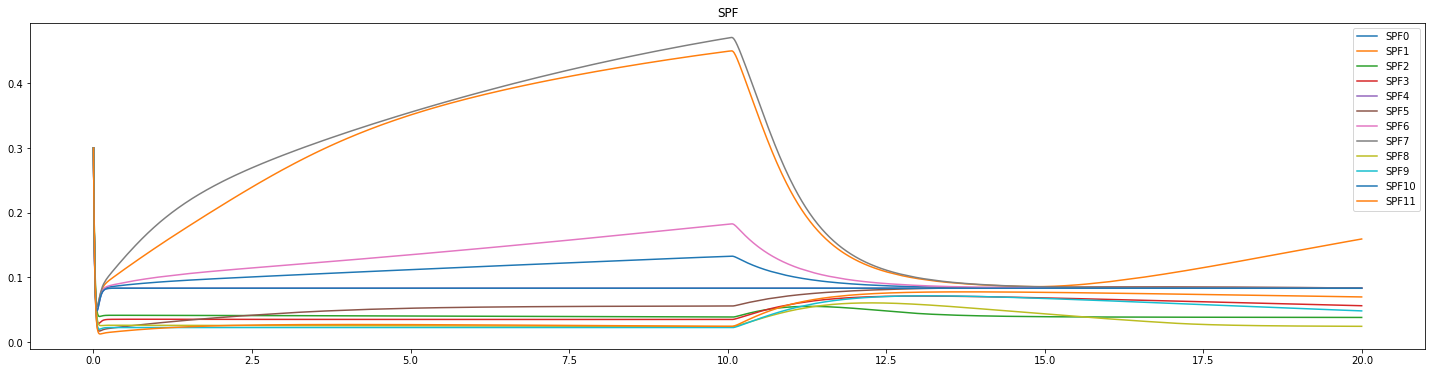

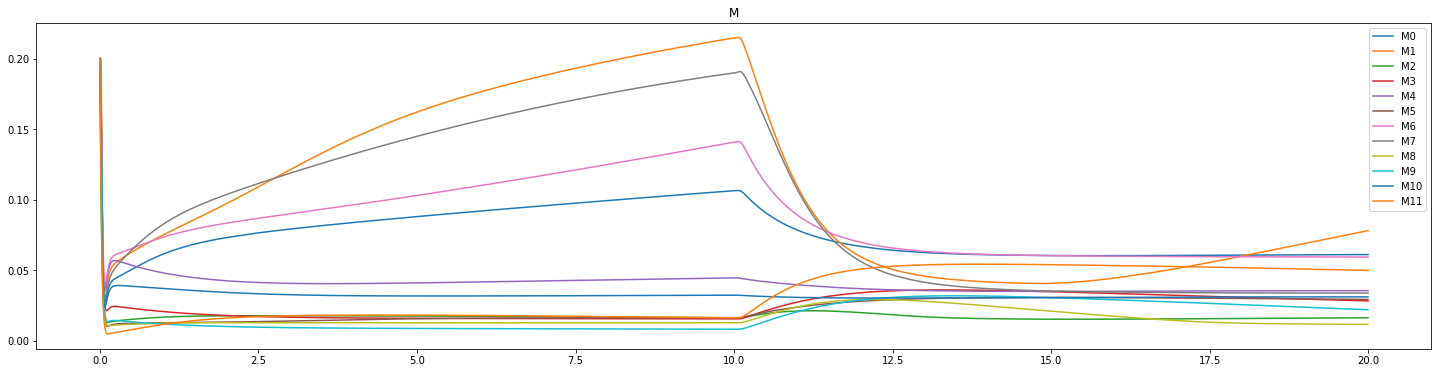

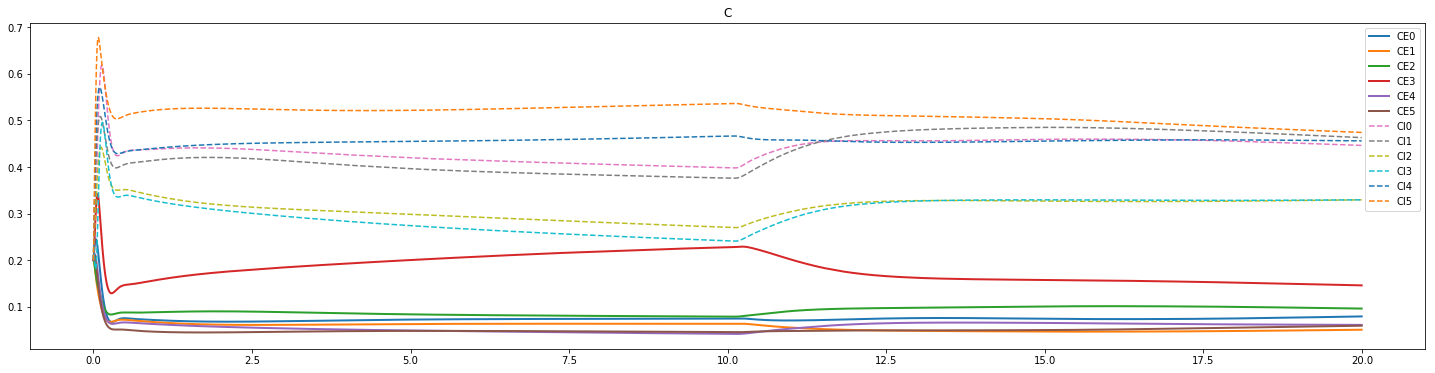

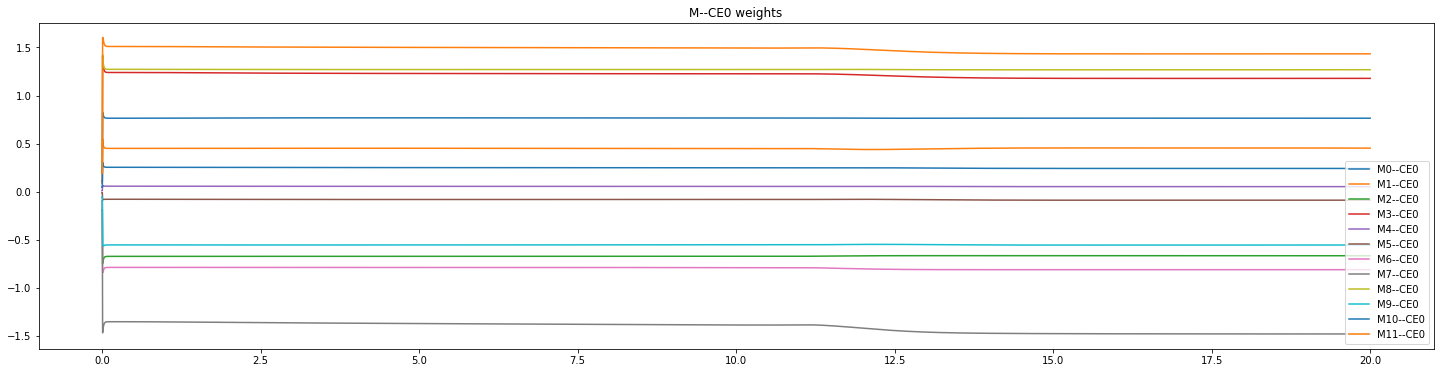

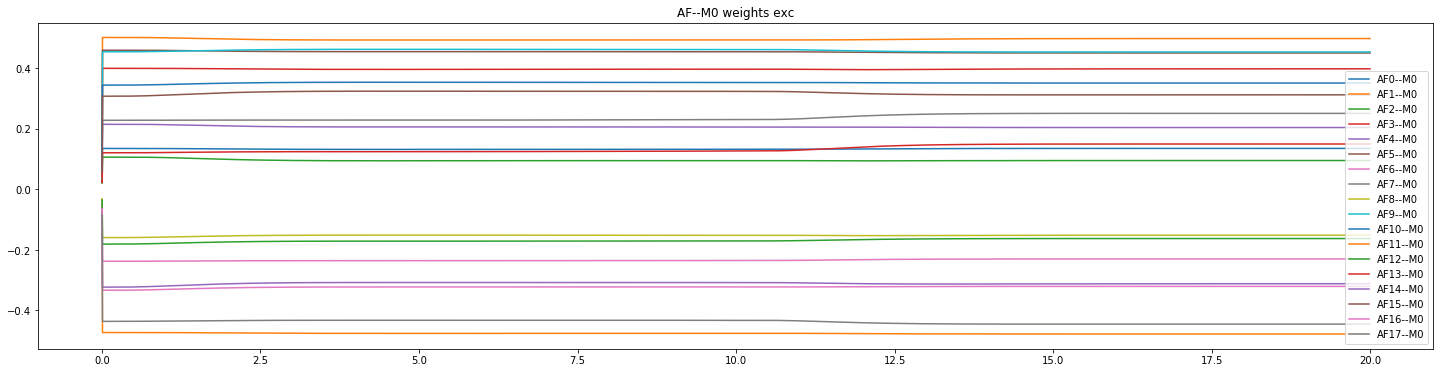

In [7]:
# Plots of SPF, M, C, M__C, AF__M 
if pl_hand:
    plant_data = all_plant_data
    data = all_data
    times = all_times
    pts = len(times)
else:
    pts = 25 # number of data points to plot

arm_activs = plant_data[P]
# SPF
fs = (25,6)
SPF_fig = plt.figure(figsize=fs)
SPF_data = np.array(data[SPF])
plt.plot(times[0:pts], SPF_data.transpose()[0:pts,:])
SPF_legends = ['SPF'+str(i) for i in range(len(SPF))]
plt.legend(SPF_legends)
plt.title('SPF')
print(SPF_data[:,-1])

if not pl_hand:
    SPF_fig2 = plt.figure(figsize=fs)
    SPF_data2 = np.array(data2[SPF])
    plt.plot(times2[0:pts], SPF_data2.transpose()[0:pts,:])
    SPF_legends = ['SPF2'+str(i) for i in range(len(SPF))]
    plt.legend(SPF_legends)
    plt.title('SPF2')
    print(SPF_data2[:,-1])

# M
M_fig = plt.figure(figsize=fs)
M_data = np.array(data[M])
plt.plot(times[0:pts], M_data.transpose()[0:pts,:])
M_legends = ['M'+str(i) for i in range(len(M))]
plt.legend(M_legends)
plt.title('M')
print(M_data[:,-1])

if not pl_hand:
    M_fig2 = plt.figure(figsize=fs)
    M_data2 = np.array(data2[M])
    plt.plot(times2[0:pts], M_data2.transpose()[0:pts,:])
    M_legends = ['M2'+str(i) for i in range(len(M))]
    plt.legend(M_legends)
    plt.title('M2')
    print(M_data2[:,-1])

# C
C_fig = plt.figure(figsize=fs)
CE_data = np.array(data[CE])
CI_data = np.array(data[CI])
plt.plot(times[0:pts], CE_data.transpose()[0:pts,:], linewidth=2)
plt.plot(times[0:pts], CI_data.transpose()[0:pts,:], '--')
C_legends = ['CE'+str(i) for i in range(len(CE))]
C_legends += ['CI'+str(i) for i in range(len(CI))]
plt.legend(C_legends)
plt.title('C')

if not pl_hand:
    C_fig2 = plt.figure(figsize=fs)
    CE_data2 = np.array(data2[CE])
    CI_data2 = np.array(data2[CI])
    plt.plot(times2[0:pts], CE_data2.transpose()[0:pts,:], linewidth=2)
    plt.plot(times2[0:pts], CI_data2.transpose()[0:pts,:], '--')
    C_legends = ['CE2'+str(i) for i in range(len(CE))]
    C_legends += ['CI2'+str(i) for i in range(len(CI))]
    plt.legend(C_legends)
    plt.title('C2')


# M--CE0 weights
W_fig1 = plt.figure(figsize=fs)
w_track_data = np.array(data[M_CE_track])
plt.plot(times[:pts], w_track_data.transpose()[:pts,:])
M_CE0_legends = ['M'+str(i)+'--CE0' for i in range(len(M_CE_track))]
plt.legend(M_CE0_legends)
plt.title('M--CE0 weights')

if not pl_hand:
    W_fig1b = plt.figure(figsize=fs)
    w_track_datab = np.array(data2[M_CE_track])
    plt.plot(times2[:pts], w_track_datab.transpose()[:pts,:])
    M_CE0_legends2 = ['M'+str(i)+'--CE0 2' for i in range(len(M_CE_track))]
    plt.legend(M_CE0_legends2)
    plt.title('M--CE0 2 weights')

# AF--M0 weights
W_fig2 = plt.figure(figsize=fs)
w_track_data2 = np.array(data[AF_M0_track[0:18]])
plt.plot(times[:pts], w_track_data2.transpose()[:pts,:])
AF_M0_legends = ['AF'+str(i)+'--M0' for i in range(len(AF_M0_track[:18]))]
plt.legend(AF_M0_legends)
plt.title('AF--M0 weights exc')

if not pl_hand:
    W_fig2b = plt.figure(figsize=fs)
    w_track_data2b = np.array(data2[AF_M0_track[0:18]])
    plt.plot(times2[:pts], w_track_data2b.transpose()[:pts,:])
    AF_M0_legends2 = ['AF'+str(i)+'--M0 2' for i in range(len(AF_M0_track[:18]))]
    plt.legend(AF_M0_legends2)
    plt.title('AF--M0 2 weights exc')

"""
W_fig3 = plt.figure(figsize=fs)
w_track_data3 = np.array(data[AF_M0_track[18:]])
plt.plot(times, w_track_data3.transpose())
AF_M0_legends2 = ['AF'+str(i)+'--M0' for i in range(len(AF_M0_track[18:]))]
plt.legend(AF_M0_legends2)
plt.title('AF--M0 weights inh')
"""

plt.show()

shoulder angle: 0.215537, shoulder vel: 1.979536
AFe_data:
[1.25154747e-01 2.57220159e-01 3.43633156e-01 1.91370977e-01
 2.60547179e-01 2.54729727e-01 1.54508139e-06 4.55566780e-02
 7.32645764e-06 2.84854338e-02 2.88705266e-10 1.19187538e-01
 2.81022561e-06 1.59862257e-04 5.60393340e-04 4.71221528e-02
 5.56788728e-10 1.43660436e-01]
AFi_data:
[1.03109024e-10 1.03109024e-10 1.44352633e-10 1.23730828e-10
 1.23730828e-10 1.23730828e-10 1.85596243e-10 1.23730828e-10
 3.91814290e-10 2.06218047e-10 2.88705266e-10 1.44352633e-10
 5.15545119e-10 3.29948876e-10 7.42384971e-10 5.98032338e-10
 5.56788728e-10 3.91814290e-10]


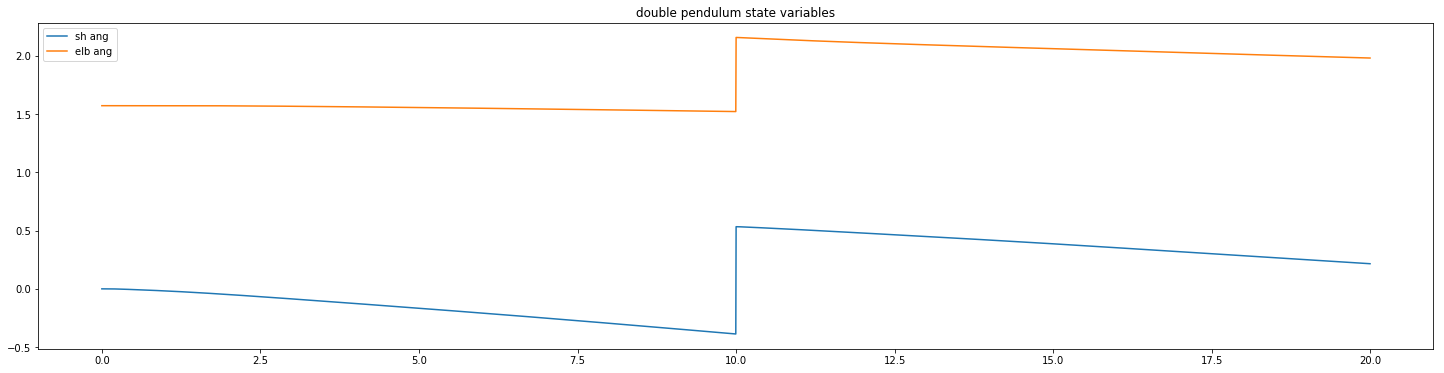

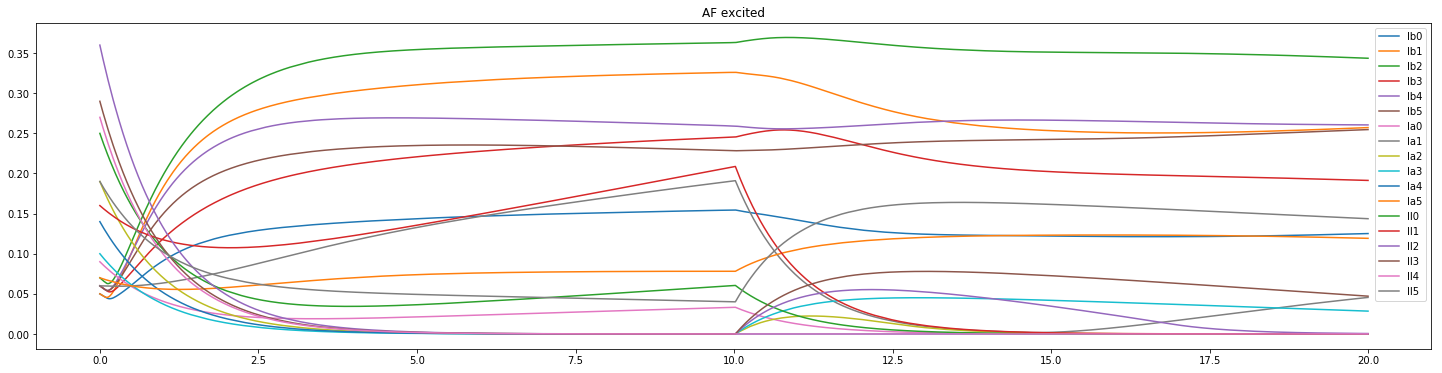

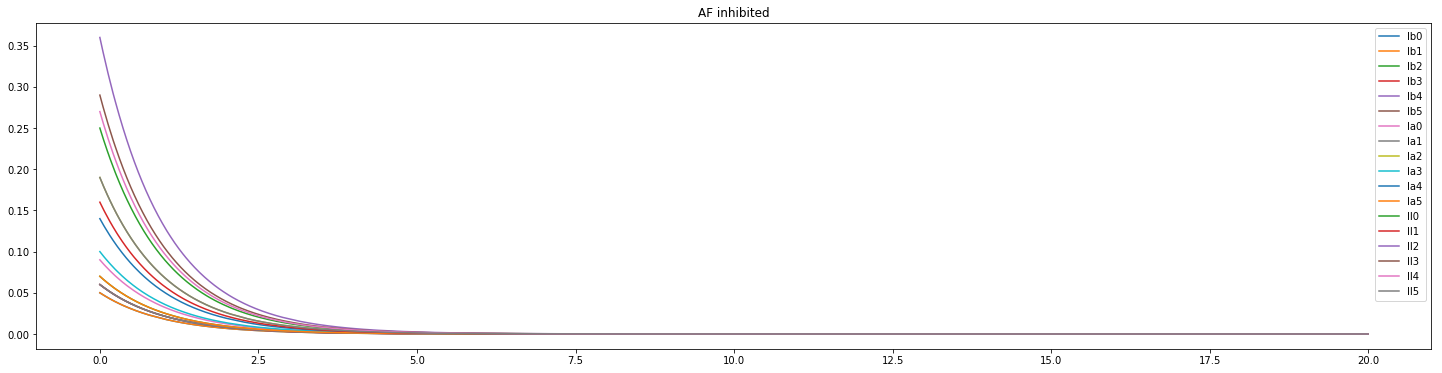

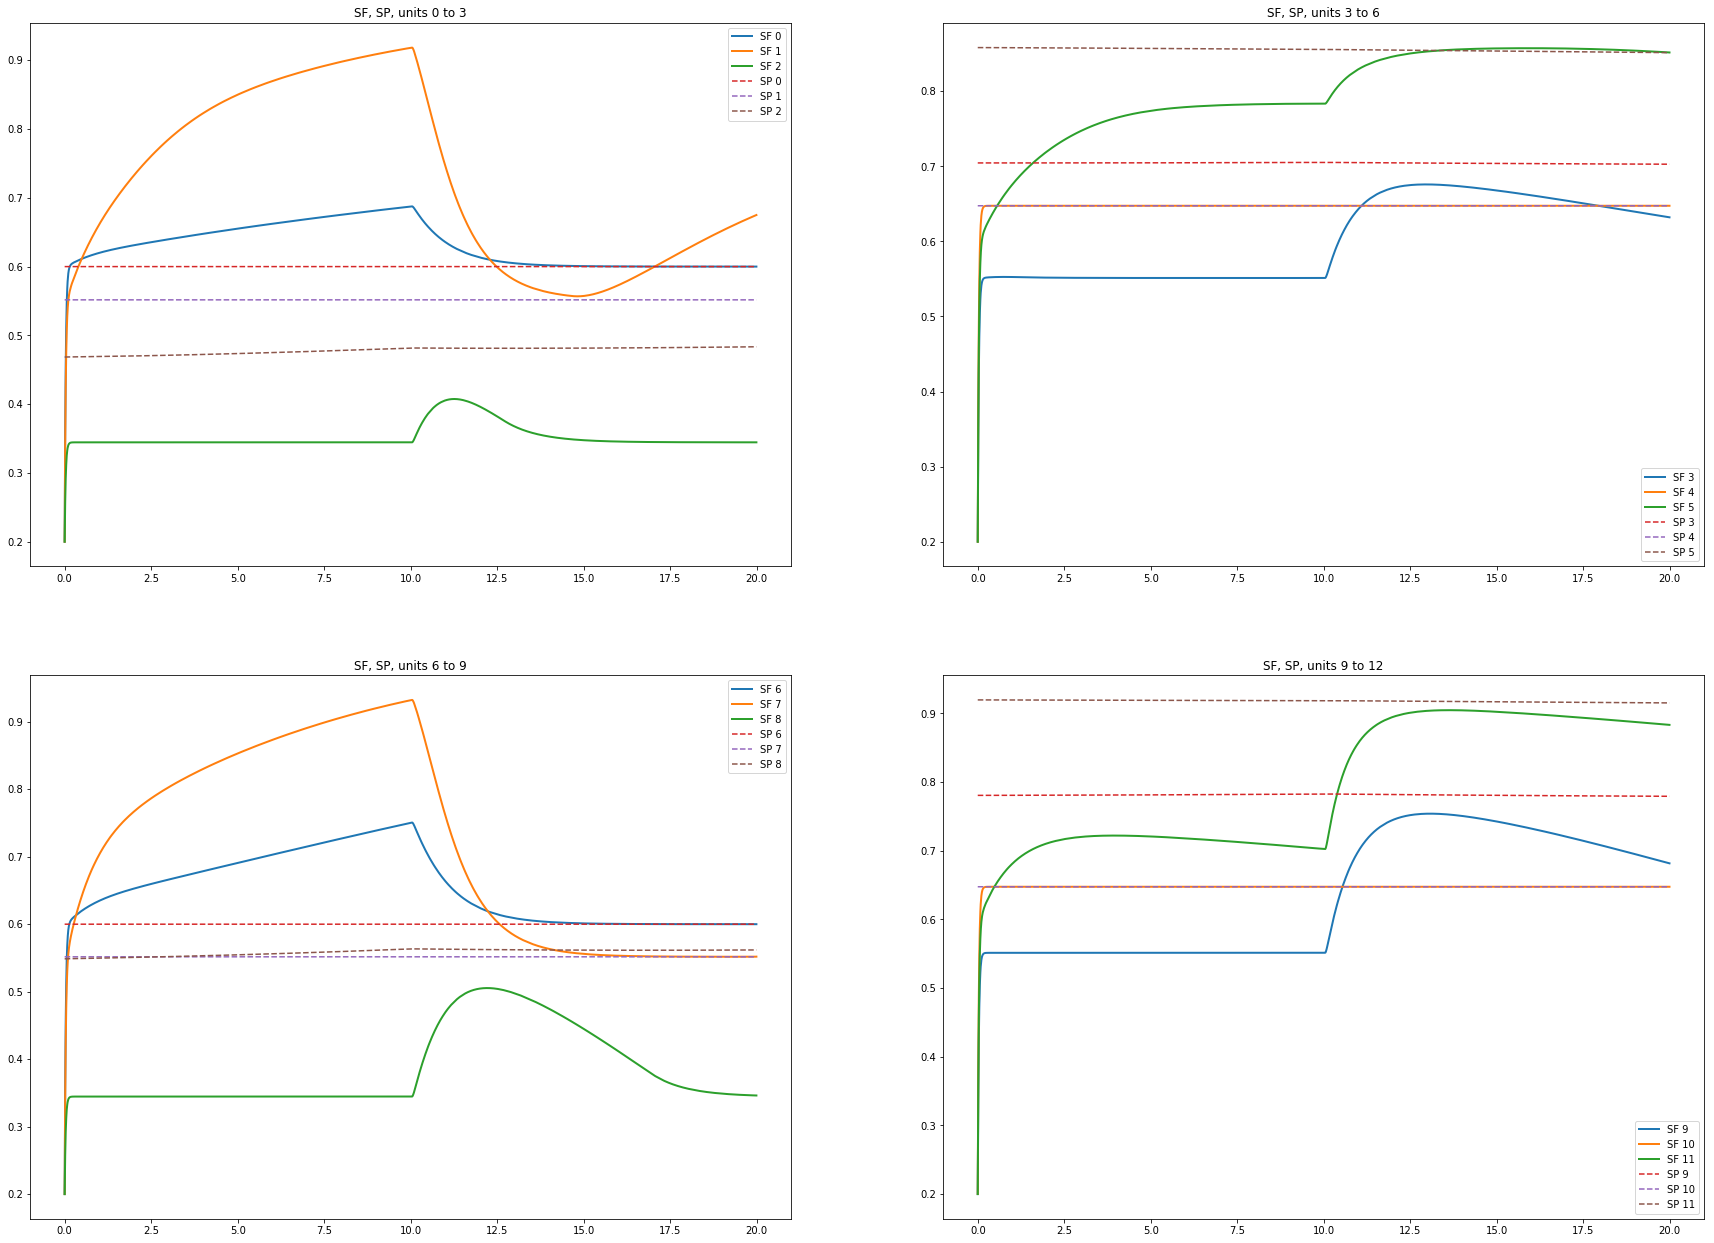

SF = 
[0.59989287 0.67485042 0.34447669 0.63198708 0.64737031 0.85149475
 0.59989656 0.55181013 0.34605623 0.68148098 0.64737031 0.88308115]
SP = 
[0.59988837 0.551566   0.48335259 0.70270793 0.64737031 0.85126578
 0.59988837 0.551566   0.56174223 0.77909398 0.64737031 0.9150613 ]


In [8]:

# P
P_fig = plt.figure(figsize=fs)
P_state = plant_data[P][:,0:4:2]
plt.plot(times, P_state)
#plt.legend(['sh ang', 'sh ang vel', 'elb ang', 'elb ang vel'])
plt.legend(['sh ang', 'elb ang',])
plt.title('double pendulum state variables')
print("shoulder angle: %f, shoulder vel: %f" % (P_state[-1,0],P_state[-1,1]))

if not pl_hand:
    P_fig2 = plt.figure(figsize=fs)
    P_state2 = plant_data2[P][:,0:4:2]
    plt.plot(times2, P_state2)
    #plt.legend(['sh ang', 'sh ang vel', 'elb ang', 'elb ang vel'])
    plt.legend(['sh ang', 'elb ang',])
    plt.title('double pendulum state variables 2')
    print("shoulder angle: %f, shoulder vel: %f" % (P_state[-1,0],P_state[-1,1]))

# AF plus
AFe_fig = plt.figure(figsize=fs)
AFe_data = np.array(data[AF[0:18]])
plt.plot(times, AFe_data.transpose())
AF_legends = ['Ib' + str(i) for i in range(6)] + \
             ['Ia' + str(i) for i in range(6)] + \
             ['II' + str(i) for i in range(6)]
plt.legend(AF_legends)
plt.title('AF excited')
print('AFe_data:')
print(AFe_data[:,-1])

# AF minus
AFi_fig = plt.figure(figsize=fs)
AFi_data = np.array(data[AF[18:36]])
plt.plot(times, AFi_data.transpose())
AF_legends = ['Ib' + str(i) for i in range(6)] + \
             ['Ia' + str(i) for i in range(6)] + \
             ['II' + str(i) for i in range(6)]
plt.legend(AF_legends)
plt.title('AF inhibited')
print('AFi_data:')
print(AFi_data[:,-1])

fs = (30,10)
# SF, SP
SF_fig, axs = plt.subplots(2, 2, figsize=(fs[0], 2.2*fs[1]))
SF_data = np.array(data[SF])
SP_data = np.array(data[SP])
for row in range(2):
    for col in range(2):
        ax = axs[row][col]
        base = 3*col + 6*row
        ax.plot(times, SF_data[base:base+3, :].transpose(), linewidth=2)
        ax.plot(times, SP_data[base:base+3, :].transpose(), '--')
        ax.set_title('SF, SP, units %d to %d' % (base, base+3))
        SF_legends = ['SF '+ str(base+i) for i in range(3)]
        SP_legends = ['SP '+ str(base+i) for i in range(3)]
        ax.legend(SF_legends + SP_legends)

plt.show()
print('SF = ')
print(SF_data[:,-1])
print('SP = ')
print(SP_data[:,-1])

average error: 0.363422


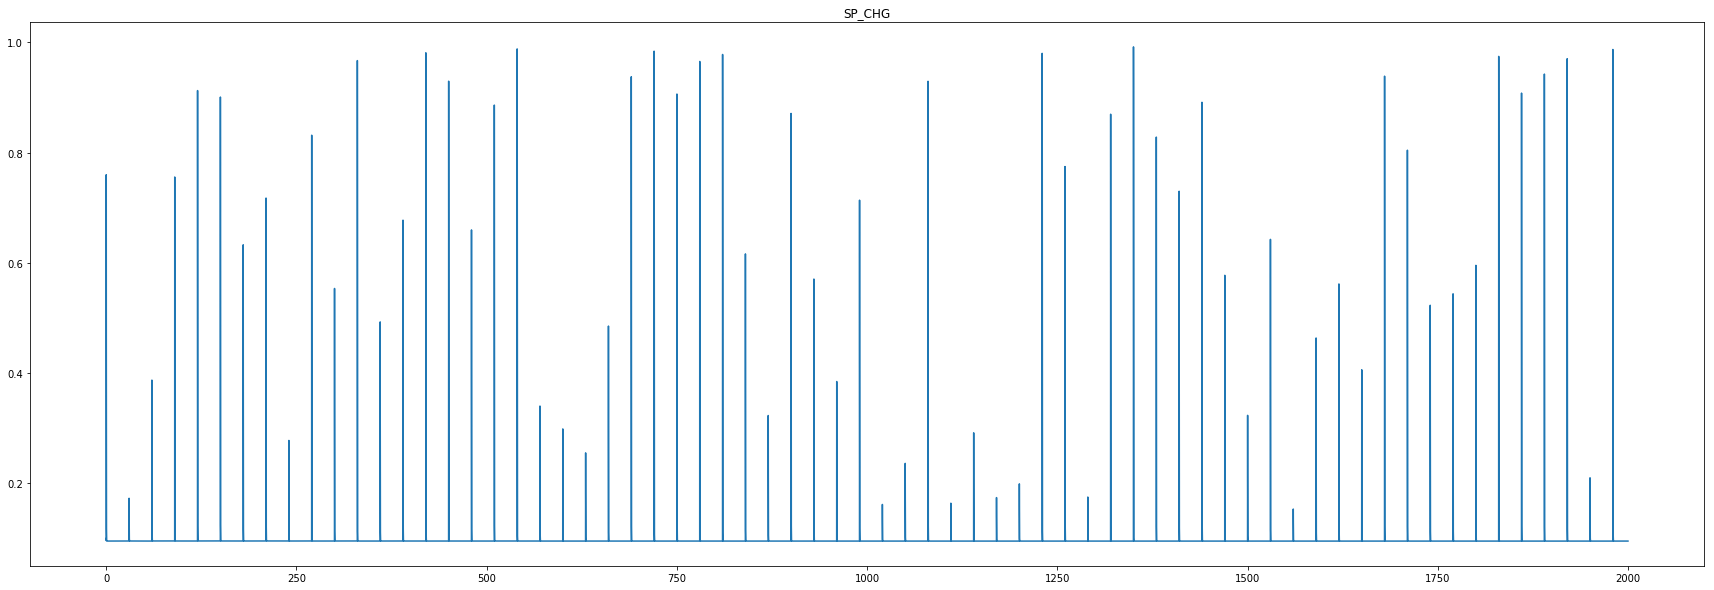

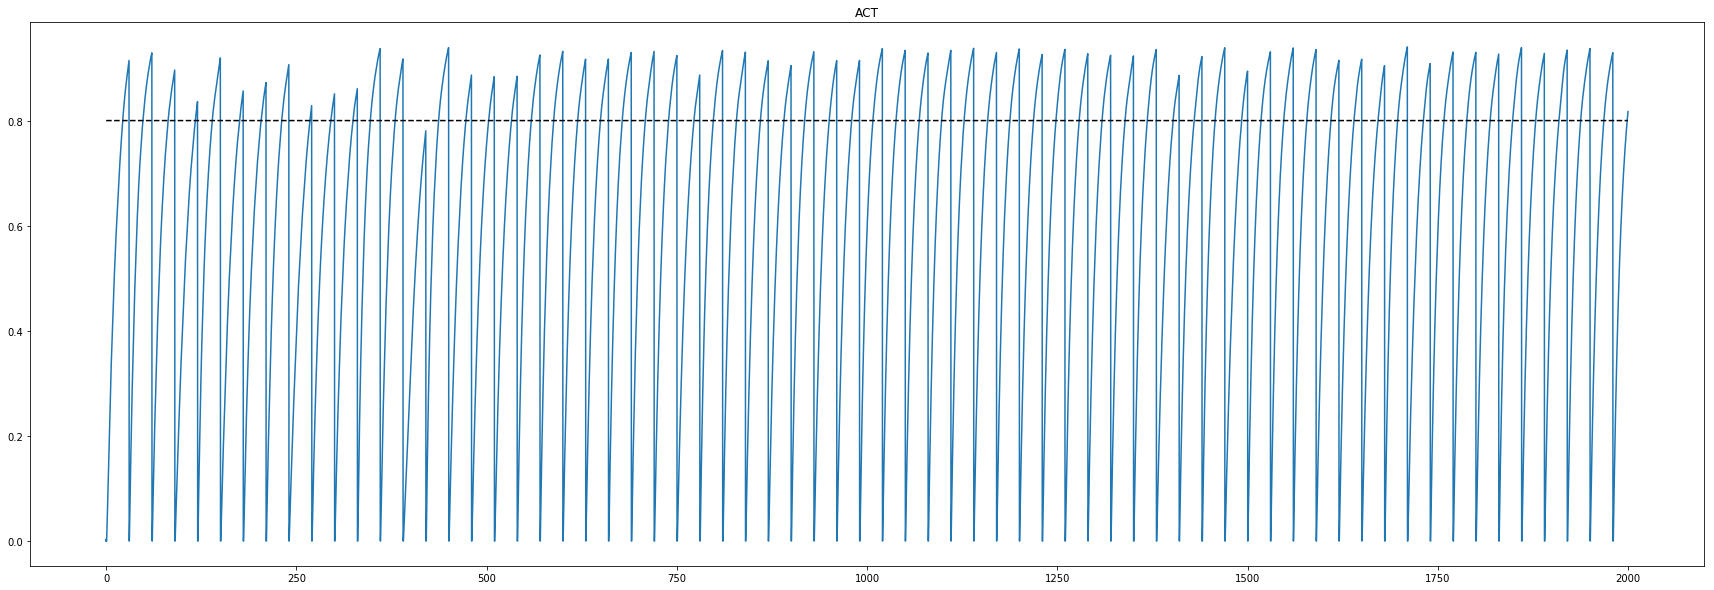

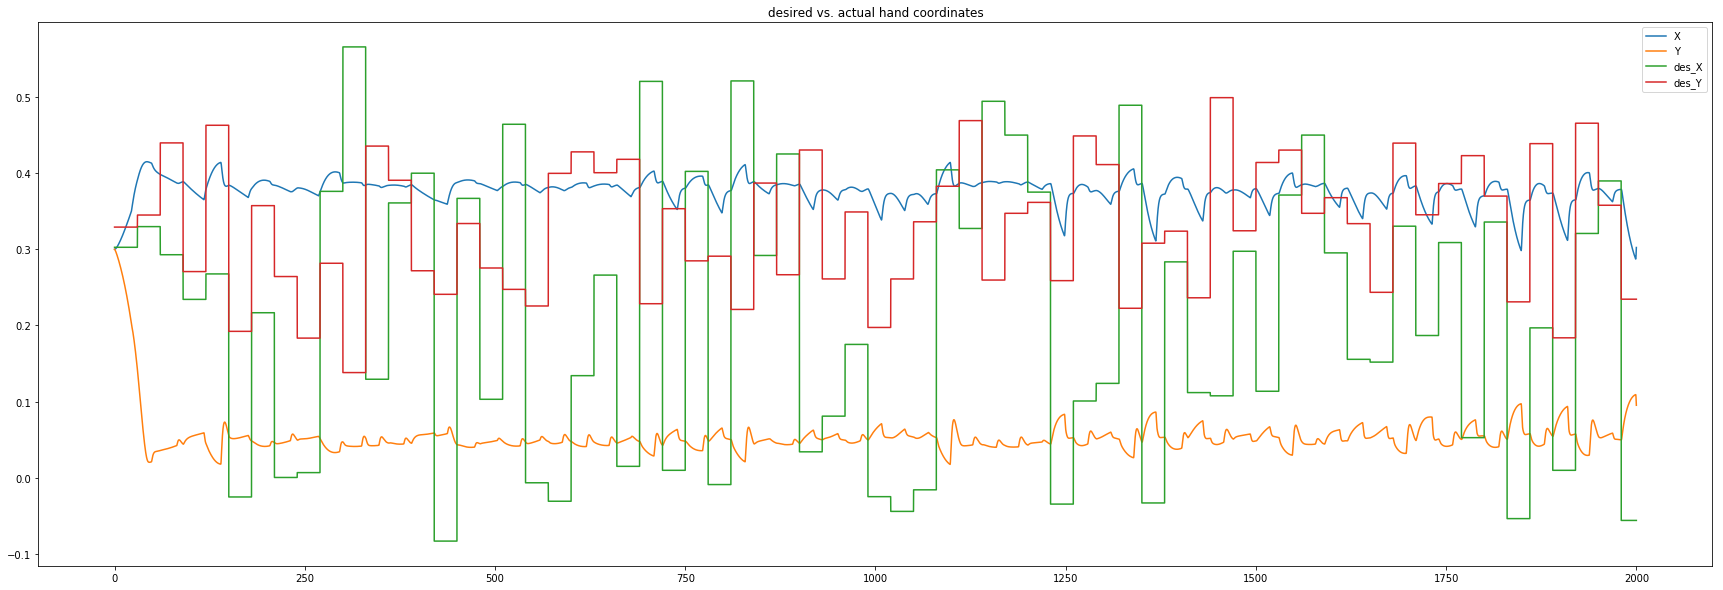

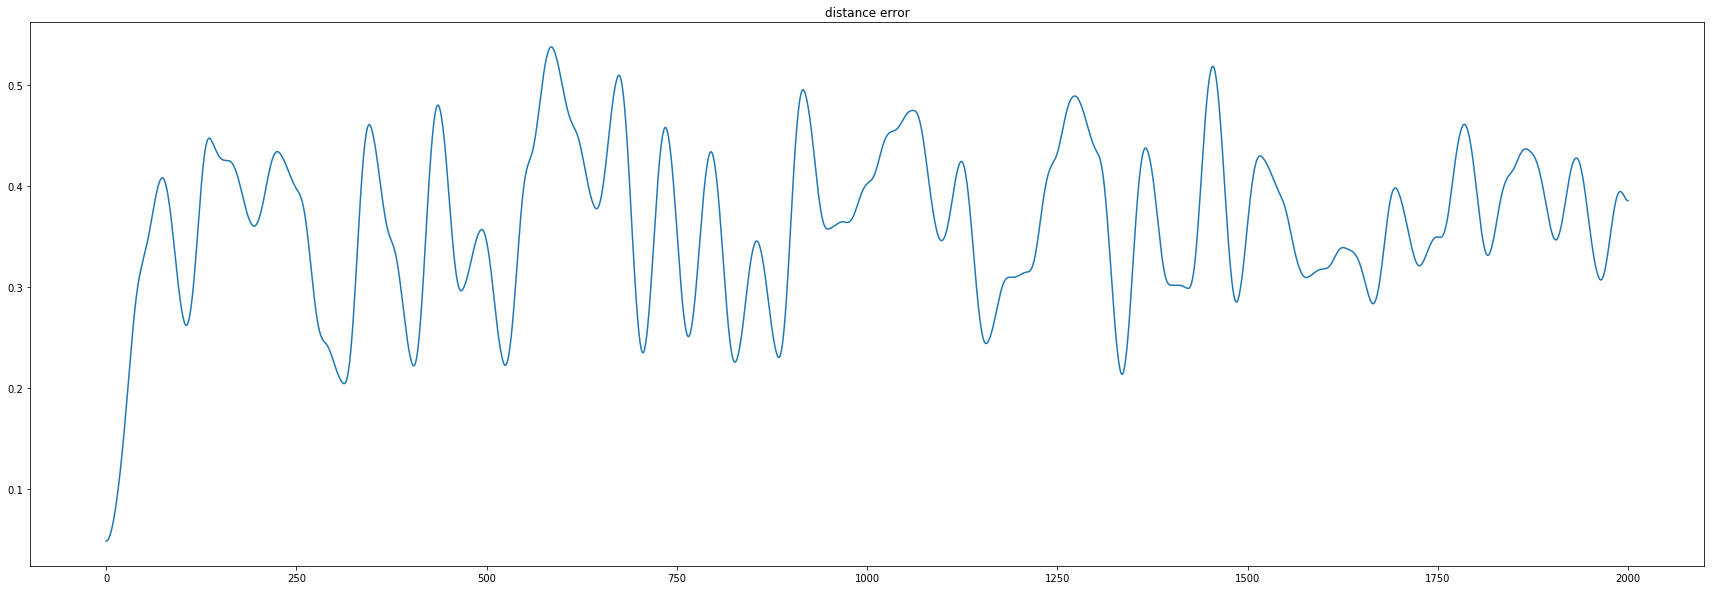

In [8]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")
    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")
    if window_len<3:
        return x
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

chg_fig = plt.figure(figsize=fs)
chg_data = np.array(data[SP_CHG])[0]
plt.plot(times, chg_data)
plt.title('SP_CHG')

act_fig = plt.figure(figsize=fs)
act_data = np.array(data[ACT])[0]
plt.plot(times, act_data)
plt.plot(times, 0.8*np.ones_like(times), 'k--')
plt.title('ACT')

plant = net.plants[P]
# modified copy-paste of plt.upd_ip_impl
q1 = arm_activs[:,0]
q2 = arm_activs[:,2]
q12 = q1+q2
c_elbow = np.array((plant.l_arm*np.cos(q1), plant.l_arm*np.sin(q1)))
c_hand = np.array((c_elbow[0] + plant.l_farm*np.cos(q12),
                   c_elbow[1] + plant.l_farm*np.sin(q12))).transpose()
coord_idxs = np.floor(times/t_pres).astype(int)
des_coords = np.array(hand_coords)[m_idxs[coord_idxs],:] # desired coordinates at each moment in time
coords_fig = plt.figure(figsize=fs)
plt.plot(times, c_hand)
plt.plot(times, des_coords)
plt.title('desired vs. actual hand coordinates')
plt.legend(['X', 'Y', 'des_X', 'des_Y'])

err_fig = plt.figure(figsize=fs)
w_len = 8001
hand_error = np.linalg.norm(c_hand-des_coords, axis=1)
smooth_hand_error = smooth(hand_error, window_len=w_len)[int(np.floor(w_len/2)):-int(np.floor(w_len/2))]
plt.plot(times, smooth_hand_error)
plt.title('distance error')
avg_error = hand_error.sum()/hand_error.size
print("average error: %f" % (avg_error))

plt.show()

AL_data:
[0.09114491 0.14235864 0.18374317 0.09813777 0.15897386 0.12605728]
Ib avg for muscle 0= 0.14766801669456844
Ia avg for muscle 0= 0.11451729831257566
II avg for muscle 0= 0.29891320436642815
Ib avg for muscle 1= 0.378487318610495
Ia avg for muscle 1= 0.22873327109540606
II avg for muscle 1= 0.347568465855951
Ib avg for muscle 2= 0.4667977667751369
Ia avg for muscle 2= -0.018230737173858813
II avg for muscle 2= 0.11971256664605424
Ib avg for muscle 3= 0.157661556374926
Ia avg for muscle 3= 0.0864611103333406
II avg for muscle 3= 0.2397470172539254
Ib avg for muscle 4= 0.41224738424192736
Ia avg for muscle 4= 0.05284279863561159
II avg for muscle 4= 0.21420956413801742
Ib avg for muscle 5= 0.35530359222204005
Ia avg for muscle 5= 0.16043976300267979
II avg for muscle 5= 0.244222437715798


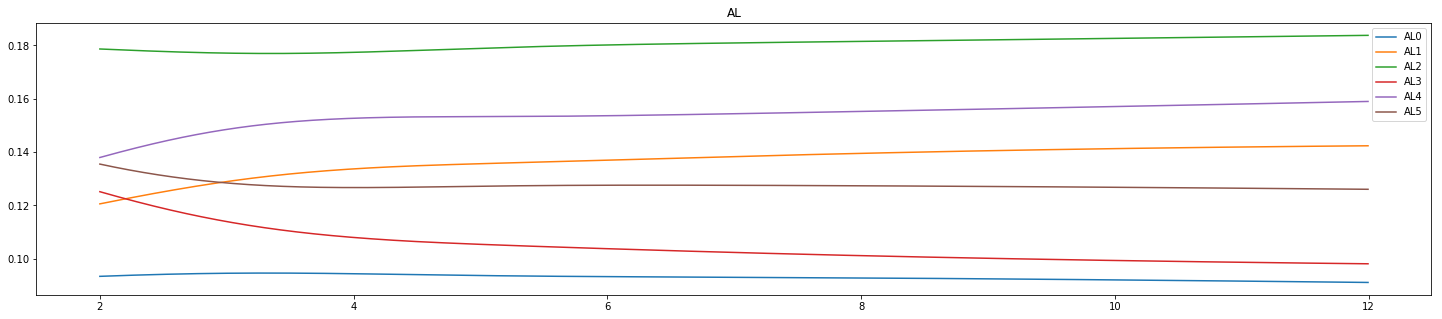

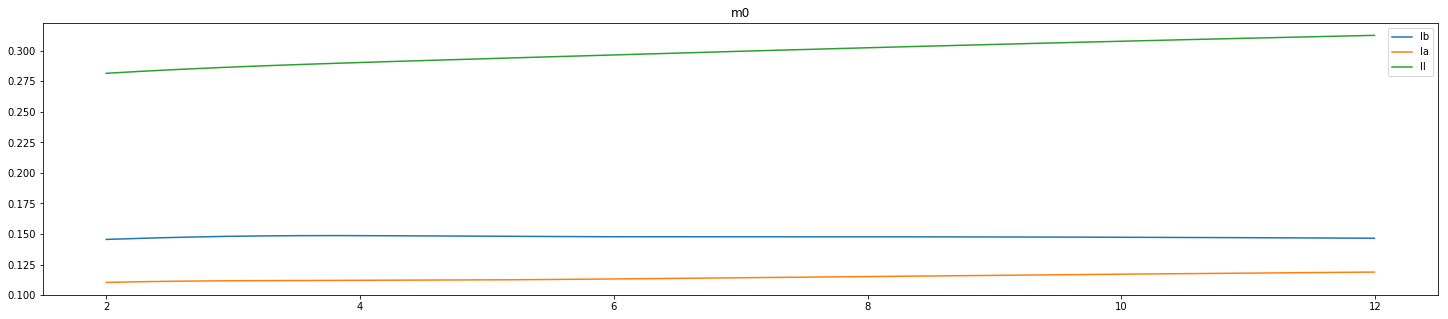

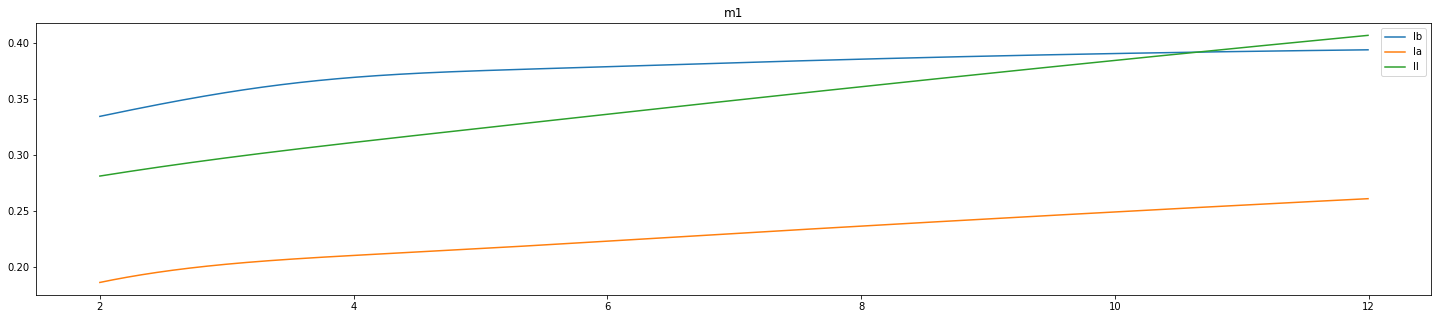

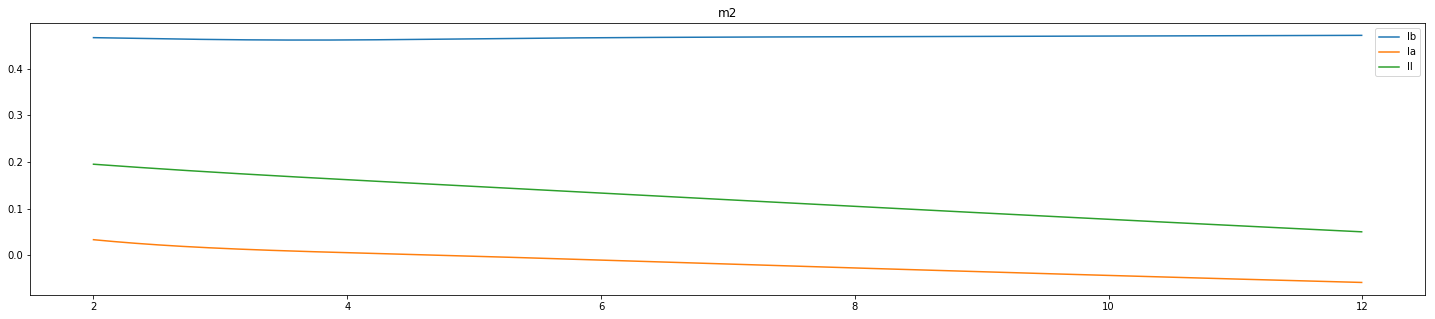

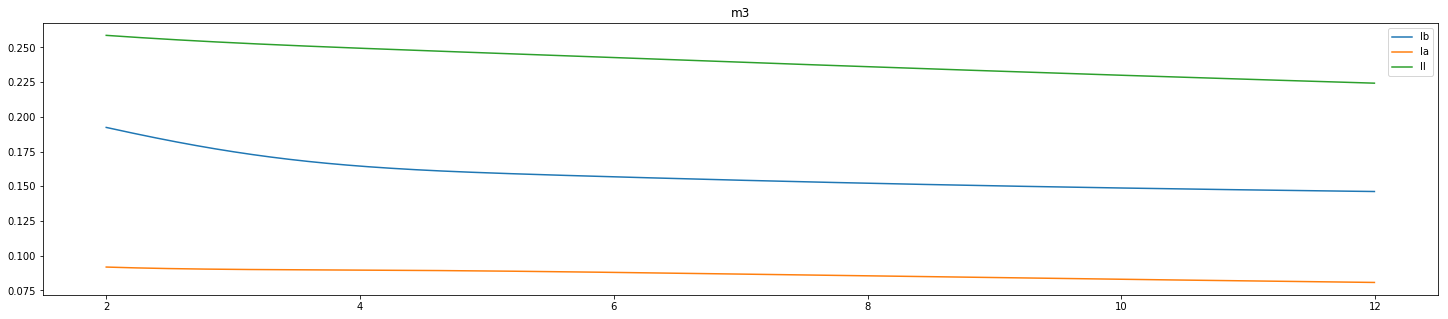

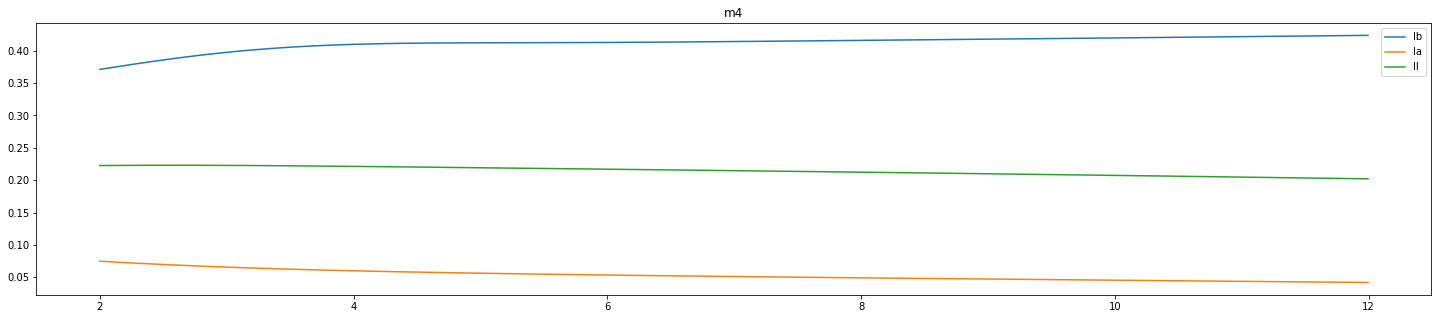

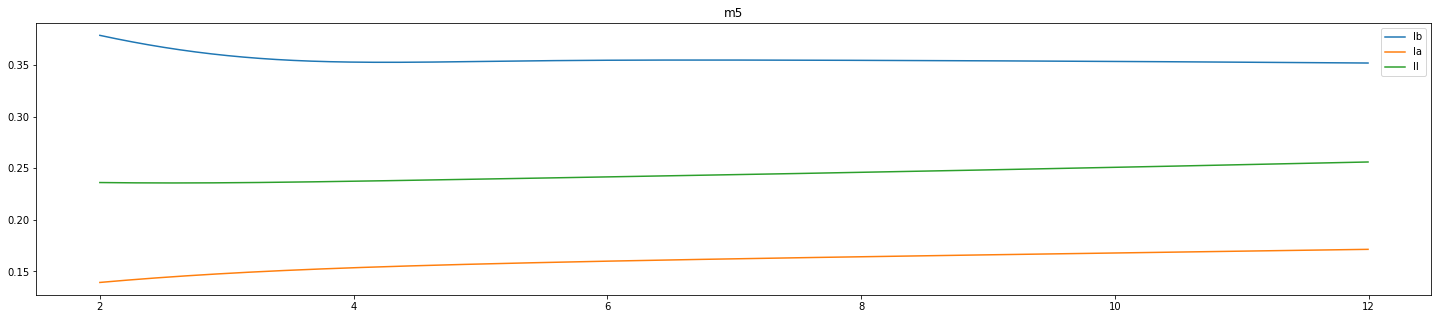

In [13]:
# Alpha units
fs2 =(25,5)
AL_fig = plt.figure(figsize=fs2)
AL_data = np.array(data[AL])
plt.plot(times, AL_data.transpose())
AL_legends = ['AL'+str(i) for i in range(len(AL))]
plt.legend(AL_legends)
plt.title('AL')
print('AL_data:')
print(AL_data[:,-1])

# plotting muscle outputs
#fs = (20,5)
legs = ['Ib', 'Ia', 'II']

for i in range(6):
    next_fig = plt.figure(figsize=fs2)
    Ib = arm_activs[:,22+i]
    Ia = arm_activs[:,28+i]
    II = arm_activs[:,34+i]
    plt.plot(times, Ib, times, Ia, times, II)
    #plt.plot(times, Ib)
    plt.legend(legs)
    plt.title('m' + str(i))
    print('Ib avg for muscle '+ str(i) + '= ' + str(np.mean(Ib)))
    print('Ia avg for muscle '+ str(i) + '= ' + str(np.mean(Ia)))
    print('II avg for muscle '+ str(i) + '= ' + str(np.mean(II)))
plt.show()

In [25]:
# checking some connections
print("Connections to motor units")
for idx, syn in enumerate(net.syns[M[0]]):
    pre_id = syn.preID
    pre_type = net.units[pre_id].type
    if pre_type is plant_models.planar_arm_v3:
        pre_pop = 'P'
    elif pre_id in AF:
        pre_pop = 'AF'
    elif pre_id in SPF:
        pre_pop = 'SPF'
    else:
        pre_pop = 'erroneous'
    if pre_pop == 'P':
        plant_out = str(syn.plant_out)
    else:
        plant_out = 'None'
    print('%d) %s (%d) --> M, w=%f, port=%d, plant_out=%s'%(idx, pre_pop, pre_id, syn.w, syn.port, plant_out))
print("-------------------------\n")
    
print("Connections to afferent units")
for idx, syn in enumerate(net.syns[AF[0]]):
    pre_id = syn.preID
    pre_type = net.units[pre_id].type
    if pre_type is plant_models.planar_arm_v3:
        pre_pop = 'P'
    elif pre_id in AF:
        pre_pop = 'A'
    elif pre_id in SPF:
        pre_pop = 'SPF'
    else:
        pre_pop = 'other'
    if pre_pop == 'P':
        plant_out = str(syn.plant_out)
    else:
        plant_out = 'None'
    print('%d) %s (%d) --> A, w=%f, port=%d, plant_out=%s'%(idx, pre_pop, pre_id, syn.w, syn.port, plant_out))
print("-------------------------\n")
    
print("Connections to spinal units")
for idx, syn in enumerate(net.syns[CE[0]]):
    pre_id = syn.preID
    pre_type = net.units[pre_id].type
    if pre_type is plant_models.planar_arm_v3:
        pre_pop = 'P'
    elif pre_id in AF:
        pre_pop = 'AF'
    elif pre_id in SPF:
        pre_pop = 'SPF'
    elif pre_id in M:
        pre_pop = 'M'
    elif pre_id in CE:
        pre_pop = 'CE'
    elif pre_id in CI:
        pre_pop = 'CI'
    else:
        pre_pop = 'other'
    if pre_pop == 'P':
        plant_out = str(syn.plant_out)
    else:
        plant_out = 'None'
    print('%d) %s (%d) --> CE, w=%f, port=%d, plant_out=%s'%(idx, pre_pop, pre_id, syn.w, syn.port, plant_out))
print("-------------------------\n")

for idx, syn in enumerate(net.syns[CI[0]]):
    pre_id = syn.preID
    pre_type = net.units[pre_id].type
    if pre_type is plant_models.planar_arm_v3:
        pre_pop = 'P'
    elif pre_id in AF:
        pre_pop = 'AF'
    elif pre_id in SPF:
        pre_pop = 'SPF'
    elif pre_id in M:
        pre_pop = 'M'
    elif pre_id in CE:
        pre_pop = 'CE'
    elif pre_id in CI:
        pre_pop = 'CI'
    else:
        pre_pop = 'other'
    if pre_pop == 'P':
        plant_out = str(syn.plant_out)
    else:
        plant_out = 'None'
    print('%d) %s (%d) --> CI, w=%f, port=%d, plant_out=%s'%(idx, pre_pop, pre_id, syn.w, syn.port, plant_out))
print("-------------------------\n")


print("Connections to plant")
for idx, syn in enumerate(net.plants[P].inp_syns[0]):
    pre_id = syn.preID
    pre_type = net.units[pre_id].type
    if pre_id in AL:
        pre_pop = 'AL'
    else:
        pre_pop = 'erroneous'
    print('%d) %s (%d, %s) --> P, w=%f'%(idx, pre_pop, pre_id, pre_type, syn.w))
print("-------------------------\n")

print("Connections to SF units")
for idx, syn in enumerate(net.syns[SF[0]]):
    pre_id = syn.preID
    pre_type = net.units[pre_id].type
    if pre_id == P:
        pre_pop = 'P'
    elif pre_id in AF:
        pre_pop = 'AF'
    elif pre_id in SPF:
        pre_pop = 'SPF'
    elif pre_id in M:
        pre_pop = 'M'
    else:
        pre_pop = 'erroneous'
    if pre_pop == 'P':
        plant_out = str(syn.plant_out)
    else:
        plant_out = 'None'
    print('%d) %s (%d) --> SF, w=%f, port=%d, plant_out=%s'%(idx, pre_pop, pre_id, syn.w, syn.port, plant_out))

Connections to motor units
0) AF (1) --> M, w=-0.260711, port=0, plant_out=None
1) AF (2) --> M, w=-0.145495, port=0, plant_out=None
2) AF (3) --> M, w=0.033441, port=0, plant_out=None
3) AF (4) --> M, w=0.226135, port=0, plant_out=None
4) AF (5) --> M, w=-0.478373, port=0, plant_out=None
5) AF (6) --> M, w=0.477644, port=0, plant_out=None
6) AF (7) --> M, w=0.219569, port=0, plant_out=None
7) AF (8) --> M, w=0.430824, port=0, plant_out=None
8) AF (9) --> M, w=-0.562601, port=0, plant_out=None
9) AF (10) --> M, w=-0.159985, port=0, plant_out=None
10) AF (11) --> M, w=0.316318, port=0, plant_out=None
11) AF (12) --> M, w=-0.151916, port=0, plant_out=None
12) AF (13) --> M, w=0.253431, port=0, plant_out=None
13) AF (14) --> M, w=0.280758, port=0, plant_out=None
14) AF (15) --> M, w=-0.367178, port=0, plant_out=None
15) AF (16) --> M, w=-0.173770, port=0, plant_out=None
16) AF (17) --> M, w=0.351532, port=0, plant_out=None
17) AF (18) --> M, w=-0.264281, port=0, plant_out=None
18) AF (19)

---

In [9]:
#Animation of the arm and muscles
%matplotlib widget
from numpy import cos, sin
from matplotlib.animation import FuncAnimation

# angles of shoulder and elbow
theta_s = arm_activs[:,0]
theta_e = arm_activs[:,2]
phi = theta_s + theta_e # elbow angle wrt x axis
# data from tracking units
acts = np.array(data[1])
ipx = data[ipx_track]
ipy = data[ipy_track]
ten = arm_activs[:, np.array(range(4,10))].transpose()
# coordinates of hand and elbow
l1 = net.plants[P].l_arm
l2 = net.plants[P].l_farm
xe = cos(theta_s)*l1
ye = sin(theta_s)*l1
xh = xe + cos(phi)*l2
yh = ye + sin(phi)*l2
# creating the figure and axis
fig = plt.figure(figsize=(8,8))
plt.axis('equal')
ax = plt.gca()
lim = l1 + l2
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.grid()
# creating lines and points
line, = ax.plot([], [], 'o-b', lw=2)
points, = ax.plot([], [], '+k')
target, = ax.plot([], [], 'gD')
# preparing a colormap for the tensions
ten_max = max(ten.max(), 1e-5)
ten_min = min(ten.min(), -1e-5)
for row_idx, row in enumerate(ten):
    for ent_idx, entry in enumerate(row):
        if entry > 0:
            ten[row_idx, ent_idx] = entry/ten_max
        else:
            ten[row_idx, ent_idx] = entry/abs(ten_min)
#ten = (ten / 2.) + 0.5 # we'll have only positive tensions
mus_lines = []
#cmap=plt.get_cmap('Reds')
#cmap=plt.get_cmap('coolwarm')
cmap=plt.get_cmap('bwr')
for i in range(6):
    mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])
# stuff used to plot the target
strt_idx = int(np.round(times[0]/t_pres)) # initial index in m_idxs

def init():
    line.set_data([], [])
    points.set_data([], [])
    for i in range(6):
        mus_lines = []
        mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])
    return line, points, mus_lines

def update(frame):
    coord_x = [0, xe[frame], xh[frame]]
    coord_y = [0, ye[frame], yh[frame]]
    ip_x = ipx[:,frame]
    ip_y = ipy[:,frame]
    tens = ten[:, frame]
    line.set_data(coord_x, coord_y)
    points.set_data(ip_x, ip_y)
    for i, ml in enumerate(mus_lines):
        idx = 2*i
        ml.set_data(ip_x[idx:idx+2], ip_y[idx:idx+2])
        ml.set_color(cmap(tens[i]))
    
    cur_time = frame*net.min_delay
    fig.suptitle('time: ' + '{:f}'.format(cur_time))
    # plotting target
    cur_idx = int(cur_time/t_pres) + strt_idx
    x_coord, y_coord = hand_coords[m_idxs[cur_idx]]
    target.set_data([x_coord], [y_coord])
    
    return line, points, mus_lines #muscle1

ani = FuncAnimation(fig, update, frames=np.arange(0, len(theta_s), 10), init_func=init, blit=True, interval=10)

plt.show()

FigureCanvasNbAgg()

In [12]:
t_pres

30.0